- **Réalisé par :**

**Zakaria Taoubi**


<p style="font-style: italic; color: #2C3E50;"> Vous pouvez trouver plus d'informations sur mon travail sur mon GitHub :</p>

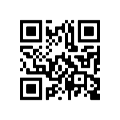

In [2]:
from IPython.display import Image, display
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('Taoubi__Zakaria.png')
fig, ax = plt.subplots(figsize=(2, 2)) # Ajustez la taille de la figure
ax.imshow(img)
ax.axis('off') 
plt.subplots_adjust(left=0.5- 0.25, right=2, top=0.5 + 0.25, bottom=0.5- 0.25)
plt.show()

##  Introduction

 <div style="background-color:#e6f7ff; padding: 20px; border-radius: 8px;">

Dans le cadre de mon master en physique médicale à l'ISSS de Settat, **dans le module Monte Carlo appliquée à la physique médicale**, sous la direction du **Pr. Mustapha Krim**, j'ai réalisé un mini projet sur la modélisation des trajectoires de photons.

Le code Python présenté utilise des simulations de Monte Carlo pour **modéliser les trajectoires de photons interagissant avec l'eau en fonction de leur énergie**. Les méthodes de Monte Carlo sont des outils puissants en physique pour la modélisation stochastique, et dans ce contexte, elles sont appliquées pour simuler les interactions complexes entre les photons et l'eau.

La simulation prend en compte divers processus d'interaction tels que :

- La diffusion Compton
- L'effet photoélectrique
- La production de paires

Ces processus contribuent collectivement à l'atténuation des photons dans le milieu de propagation, offrant ainsi un modèle représentatif des interactions photon-eau dans un contexte d'énergie donné.
</div>


##  Outils Utilisés
Dans le cadre de ce projet, les outils suivants ont été utilisés :

**Python** : J'ai utilisé ce langage pour la simulation et le traitement des données.

**Jupyter Notebook** : J'ai utilisé cet environnement pour la rédaction du rapport et l'exécution du projet.

 <div style="background-color:#e6f7ff; padding: 20px; border-radius: 8px;">

## Plan du projet
    
Voici l'outline que j'ai suivi, basé sur le cours de mon **professeur Mustapha Krim.**

**Énergies des photons simulées**

**1 - Interactions des photons**

  - 1.1 Effet photoélectrique
  - 1.2 Diffusion Compton
  - 1.3 Production de paires
  
**2 - Atténuation des photons**

  - 2.1 Coefficient d'atténuation et section efficace d'interaction
  
**3 - Probabilité d'intéraction**

**4 - Échantillonnage des longueurs de pas des photons**

  - 4.1 Distributions de probabilité de profondeur
  - 4.2 Méthode de transformation inverse de Monte Carlo
  
**5 - Calcul de l'énergie des photons diffusés**

**6 - Échantillonnage des angles de diffusion Compton**

  - 6.1 Section efficace différentielle normalisée
  - 6.2 Échantillonnage par rejet de Monte Carlo
  
**7 - Simulation du chemin des photons**

 - 7.1 Transformation du repère de référence
 - 7.2 Simulation des trajectoires des photons dans un milieu
 
**8 - Conclusion et visualisations**

 - 8.1 Trajectoires des photons à haute et basse énergie
 - 8.2 Représentation visuelle : Contraste énergétique
 - 8.3 Évolution des photons de 2 MeV : Atténuation et diffusion
</div>


> **Note** : J'ai aussi réalisé un autre projet pour calculer une intégrale en quatre dimensions en C++. Vous pourrez le voir à la fin de ce projet.  J'ai choisi de l'écrire dans Visual Studio, car Jupyter Notebook ne supporte pas directement l'exécution de code en C++ sans ajouter de noyau spécifique comme `xeus-cling`. Vous pouvez le voir dans mon Gihtub

### Avant de commencer à coder, j'ai importé toutes les bibliothèques nécessaires pour la simulation. Voici la liste des bibliothèques :

In [2]:
!pip install bottleneck

In [3]:
pip install numpy==1.23.5 pandas==2.1.3 pip scipy==1.9.3

Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np          # Numpy est utilisé pour les opérations mathématiques et les tableaux
import matplotlib.pyplot as plt # Matplotlib est utilisé pour la visualisation des données
import random              # Bibliothèque pour générer des nombres aléatoires
import scipy.stats as scp # Scipy est utilisé pour les distributions statistiques et d'autres fonctions avancées
import pandas as pd          # Pandas est utilisé pour la manipulation et l'analyse des données
from sklearn.preprocessing import PolynomialFeatures # Pour générer des caractéristiques polynomiales
from sklearn.linear_model import LinearRegression # Pour effectuer la régression linéaire
import math               # Bibliothèque mathématique pour des fonctions supplémentaires comme pi
from math import pi        # Importation spécifique de la constante pi pour un usage direct
%matplotlib inline         
import warnings           # Importation de la bibliothèque pour gérer les avertissements
warnings.simplefilter("ignore") # Désactivation des avertissements dans le notebook

 <div style="background-color:#e6f7ff; padding: 20px; border-radius: 8px;">

## Énergies des photons simulées

Dans cette simulation, je vais me concentrer sur deux **énergies de photons**, à savoir **50 keV** et **2 MeV**. Ces énergies ont été choisies car elles couvrent les trois interactions des photons que nous avons abordées, tout en mettant en évidence les variations des trajectoires des photons en fonction de leur énergie.

Je peux ajuster ces énergies dans l'intervalle suivant : **0 - 20 MeV**. Cependant, il est important d'ajuster les **paramètres de simulation** en fonction de l'énergie des photons afin de garantir des résultats précis et éviter toute complication.
</div>


In [5]:
    ## Les énergies des photons sont saisies en MeV
photon_energy_1 = 0.05  #  J'ai Défini l'énergie du premier photon (en MeV)
photon_energy_2 = 2     #  J'ai Défini l'énergie du deuxième photon (en MeV)


##  Interactions des photons



### Constantes fondamentales et fonctions :
J'ai commencé le code par définir des constantes fondamentales liées aux processus de **diffusion Compton**, d'**effet photoélectrique**, et de **production de paires**. Ces constantes incluent la masse au repos de l'électron, le nombre d'électrons par unité de volume dans l'eau, le rayon classique de l'électron, la constante de structure fine, ainsi que le numéro atomique de l'eau. Ces constantes sont des paramètres cruciaux pour le calcul des sections efficaces et des probabilités d'interaction.


In [6]:
## Constantes ##
moc2 = 0.510998955 # Masse au repos de l'électron en MeV
n_v = 3.43*1e+22 # Nombre d'électrons par unité de volume dans l'eau (cm⁻³)
re = 2.81794 * 1e-13  # Rayon classique de l'électron en cm
alpha = 1 / 137  #  Constante de structure fine
Z = 10  # Numéro atomique approximatif de l'eau (H₂O)

## Effet Photoélectrique


**L'effet photoélectrique** est un phénomène théorisé par Albert Einstein, où le photon incident est absorbé par l'atome, ce qui entraîne une excitation ou une ionisation en fonction de l'énergie du photon incident. Toutefois, dans le cadre de la simulation des trajectoires des photons, nous nous intéressons principalement au fait que le photon est retiré du trajet du faisceau s'il interagit par l'effet photoélectrique.
La section efficace pour l'effet photoélectrique peut être calculée à l'aide de la formule suivante :

In [7]:
#from sympy import symbols, sqrt, pi
#r_e, alpha, Z, k = symbols('r_e alpha Z k')
#sigma_ph = (16/2) * sqrt(2) * pi * r_e**2 * alpha**4 * (Z**5 / k**3.5)
#sigma_ph

Où :
- $r_{e}$ est le rayon classique de l'électron,
- $\alpha$ est la constante de structure fine,
- $Z$ est le numéro atomique du matériau,
- $k$ est le rapport entre l'énergie du photon et l'énergie au repos de l'électron.

L'équation ci-dessus montre la relation complexe entre la section efficace et divers facteurs. Cependant, il est important de noter que la section efficace est principalement influencée par deux facteurs clés : le numéro atomique $Z$ élevé à la puissance 5 et l'énergie du photon inversement cubée $1/(hv)^3$. La dépendance en $Z^5$ met en évidence le fait que les interactions sont plus probables avec des noyaux cibles plus lourds, qui possèdent un plus grand nombre d'électrons disponibles pour l'excitation. De plus, **la section efficace diminue à mesure que l'énergie du photon augmente**, ce qui indique que l'effet photoélectrique devient plus pertinent pour **les photons de faible énergie**

In [8]:
def sigma_ph(en):
    a = en/moc2
    return (16 / 2) * np.sqrt(2) * np.pi * (re ** 2) * (alpha ** 4) * ((Z ** 5) / (a ** 3.5))

## Diffusion Compton



**La diffusion Compton** est un processus fondamental dans lequel les photons interagissent avec des particules chargées, généralement des électrons, ce qui entraîne un changement de direction du photon et un transfert d'énergie à l'électron. Ce phénomène, découvert par Arthur H. Compton, est un élément clé pour comprendre le comportement des rayons X et des rayons gamma lorsqu'ils traversent la matière. La section efficace de diffusion Compton $σ$ quantifie la probabilité que cet événement de diffusion se produise et est définie par l'équation de Klein-Nishina :

In [9]:
#from sympy import symbols, pi, log
#Z, r_e, k = symbols('Z r_e k')
#sigma_c = 2 * pi * Z * r_e**2 * (
#    (1 + k) / k**2 * (2 * (1 + k) / (1 + 2 * k) - log(1 + 2 * k) / k) +
#    log(1 + 2 * k) / (2 * k) -
#    (1 + 3 * k) / (1 + 2 * k)**2
#)
#sigma_c

Cette équation décrit la probabilité qu'un photon subisse une diffusion Compton au sein d'un milieu, la section efficace dépendant de l'énergie du photon incident. De cela, nous pouvons en déduire que l'interaction photonique dominante, à mesure que l'énergie du photon incident augmente, passe de l'effet photoélectrique à la diffusion Compton. De plus, la probabilité d'interaction dépend de la densité électronique de la cible, où les électrons plus faiblement liés sont présents.

In [10]:
## Fonction pour calculer la section efficace de la diffusion Compton ##
def sigma(en):
  a = en/moc2 # Calcul du paramètre 'a' basé sur l'énergie de la particule (en) et la masse au repos de l'électron (moc2)
  t1 = ((1+a)/a**2)*(((2*(1+a)/(1+2*a)) - np.log(1 + 2*a)/a))
  t2 = np.log(1+2*a)/ (2*a)
  t3 = (1+3*a)/((1+2*a)**2)
  t= (t1+t2-t3)
# Retourner la section efficace totale, multipliée par le facteur de Z et le carré du rayon classique de l'électron (re)
  return 2*Z*np.pi*((re**2)) * t 

## Production de paires


La production de paires représente un phénomène important dans lequel un photon de haute énergie est absorbé dans le champ électromagnétique nucléaire d'un atome, ce qui entraîne la création d'une paire électron-positron. Ce processus complexe nécessite que l'énergie du photon incident dépasse deux fois l'énergie de repos de l'électron, soit environ **1,022 MeV**, pour que l'interaction puisse avoir lieu.

La détermination de la section efficace totale pour la production de paires est complexe et souvent approximée par des modèles théoriques. Elle englobe divers facteurs tels que les propriétés du matériau cible, l'énergie des photons incidents et les principes de l'électrodynamique quantique. La section efficace atomique de la production de paires peut être approximée par :


In [11]:
#from sympy import symbols, pi, log, Eq
#a, r_0, Z, P_bar, k = symbols('a r_0 Z P_bar k')
#equation = Eq(k, a * r_0**2 * Z**2 * P_bar)
#equation


En observant l'équation  , **on peut en déduire que la section efficace atomique pour la production de paires est proportionnelle au carré du numéro atomique $Z$ et à l'énergie du photon incident**. Cette relation implique que la production de paires devient de plus en plus significative pour les photons de haute énergie et dans les matériaux ayant des numéros atomiques plus élevés.

Pour le but de cette simulation, nous allons approximer la section efficace de la production de paires à partir de valeurs tabulées et utiliser une régression polynomiale pour estimer la section efficace dans une plage d'énergies.


In [12]:
data = {
    'Energy (energyMev)': [0.0001, 0.00015, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0008, 0.001, 0.0015, 0.002, 0.003, 0.004, 0.005, 0.006, 0.008, 0.01, 0.015, 0.02, 0.03, 0.04, 0.05, 0.06, 0.08, 0.1, 0.15, 0.2, 0.3, 0.4, 0.5, 0.6, 0.66163, 0.8, 1, 1.1732, 1.2522, 1.3325, 1.5, 2, 3, 4, 5, 6, 8, 10, 15, 20],
    'Hydrogen cs': [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.70E-29, 8.03E-29, 1.67E-28, 4.43E-28, 1.78E-27, 5.11E-27, 8.30E-27, 1.11E-26, 1.37E-26, 1.79E-26, 2.14E-26, 2.79E-26, 3.28E-26],
    'Oxygen cs': [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.80E-27, 5.29E-27, 1.09E-26, 2.87E-26, 1.14E-25, 3.33E-25, 5.31E-25, 7.12E-25, 8.71E-25, 1.14E-24, 1.36E-24, 1.78E-24, 2.08E-24]
}
df = pd.DataFrame(data)
print(df.tail())

### Calcul de la moyenne pondérée et création d'un nouveau DataFrame
weighted_average = (df['Hydrogen cs'] * 2 + df['Oxygen cs']) / 3
df_w = pd.DataFrame({'energyMev': df['Energy (energyMev)'], 'cs': weighted_average})
#print(df_w)

    Energy (energyMev)   Hydrogen cs     Oxygen cs
42                 6.0  1.370000e-26  8.710000e-25
43                 8.0  1.790000e-26  1.140000e-24
44                10.0  2.140000e-26  1.360000e-24
45                15.0  2.790000e-26  1.780000e-24
46                20.0  3.280000e-26  2.080000e-24


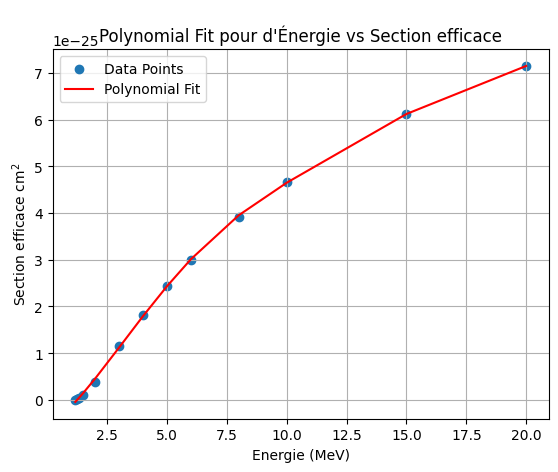

In [13]:
## Régression Polynomiale ##
filtered_df = df_w[(df_w['energyMev'] > 1) & (df_w['cs'] != 0)] ## Supprimer les 0 ##
# Extraction des variables pour la régression
X = filtered_df['energyMev'].values.reshape(-1, 1)  # Variable indépendante (features)
y = filtered_df['cs'].values  # variable dépendante (target)
# Génération des caractéristiques polynomiales
poly = PolynomialFeatures(degree=5)  # Vous pouvez modifier le degré du polynôme
X_poly = poly.fit_transform(X)
# Création d'un modèle de régression polynomiale
model = LinearRegression()
# Ajustement du modèle
model.fit(X_poly, y)
# Prédiction sur le modèle ajusté
y_pred = model.predict(X_poly)
# Obtenir les coefficients du polynôme ajusté
coefficients = model.coef_
intercept = model.intercept_

# Définir une fonction pour calculer la section efficace prédite en fonction de l'énergie
def sigma_pair_production(energy):
# Transformer l'énergie d'entrée en caractéristiques polynomiales
    energy_poly = poly.transform(np.array([[energy]]))
# Calculer la section efficace prédite en utilisant les coefficients et les caractéristiques polynomiales
    predicted_cs = np.dot(energy_poly, coefficients.T) + intercept
# Assurer la non-négativité
    if predicted_cs < 0:
        return 0
    if energy < 1.022: # Implémenter la condition d'énergie
        predicted_cs = 0
    return float(predicted_cs)


# Tracer les points de données et la courbe polynomiale
plt.scatter(X, y, label='Data Points')
plt.plot(X, y_pred, color='red', label='Polynomial Fit')
plt.xlabel('Energie (MeV)')
plt.ylabel('Section efficace cm$^{2}$')
plt.title("Polynomial Fit pour d'Énergie vs Section efficace")
plt.legend()
plt.grid(True)
plt.show()

## Atténuation des photons


L'atténuation des photons, qui indique la réduction de l'intensité d'un faisceau de photons lorsqu'il traverse de la matière, joue un rôle fondamental dans la simulation des trajectoires des photons. L'atténuation est quantifiée par le coefficient d'atténuation linéaire $\mu$, qui représente la probabilité d'interaction par unité de longueur.

Comme mentionné précédemment, la probabilité d'une interaction unique est quantifiée par la section efficace d'interaction. Ainsi, le coefficient d'atténuation est la combinaison de tous les processus d'interactions partielles et se caractérise par l'équation suivante :

In [14]:
#from sympy import symbols, Eq
#sigma_p, sigma_c, sigma_P, n_v, mu = symbols('sigma_p sigma_c sigma_P n_v mu')
#equation = Eq(mu, (sigma_p + sigma_c + sigma_P) * n_v)
#equation

Où $n_v$ est le nombre d'électrons par unité de volume dans l'eau, et $\sigma_i$ représente la section efficace pour les interactions de photons mentionnées précédemment. L'interaction principale dépend ainsi du ratio des sections efficaces et est affectée par l'énergie des photons dans notre cas.

In [15]:
# Définir l'intervalle d'énergie
energies = np.arange(0, 20,0.001) # Nous simulons des photons jusqu'à 20 MeV

"""Calculer les sections efficaces pour chaque énergie pour l'effet photoélectrique, la diffusion Compton 
et la production de paires"""

cross_sections_ph = np.array([sigma_ph(energy) for energy in energies])
cross_sections_cs = np.array([sigma(energy) for energy in energies])
cross_sections_pp = np.array([sigma_pair_production(energy) for energy in energies])

# Convertir les sections efficaces en coefficients d'atténuation
attenuation_ph = np.array(cross_sections_ph) * n_v
attenuation_cs = np.array(cross_sections_cs) * n_v
attenuation_pp = cross_sections_pp * n_v

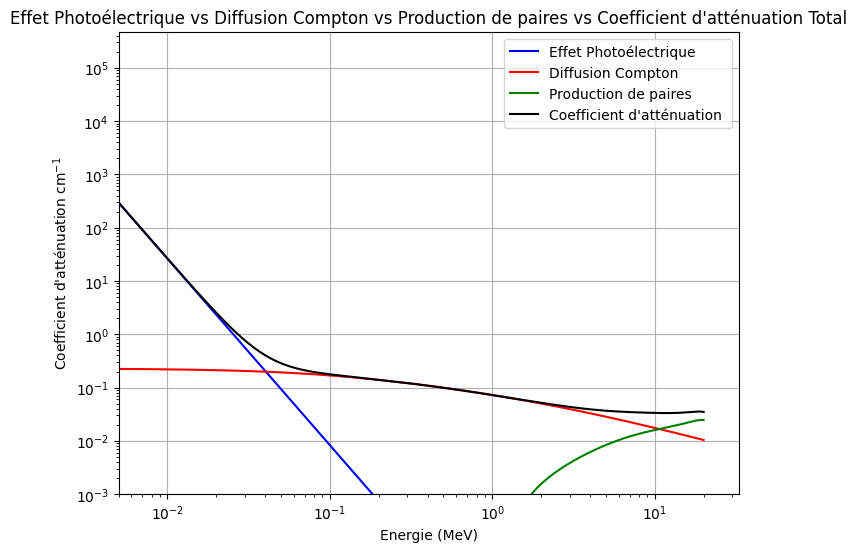

In [16]:
# Calculer le coefficient d'atténuation total
total_attenuation = attenuation_ph + attenuation_cs + attenuation_pp

"""Tracer l'effet photoélectrique, la diffusion Compton, la production de paires et les coefficients d'atténuation totaux 
en fonction de l'énergie (échelle log-log) """

plt.figure(figsize=(8, 6))
plt.plot(energies, attenuation_ph, label='Effet Photoélectrique', color='blue')
plt.plot(energies, attenuation_cs, label='Diffusion Compton', color='red')
plt.plot(energies, attenuation_pp, label='Production de paires', color='green')
plt.plot(energies, total_attenuation, label="Coefficient d'atténuation ", color='black') # Ajout du coefficients d'atténuation 
plt.xlabel('Energie (MeV)')
plt.ylabel("Coefficient d'atténuation cm$^{-1}$")
plt.title("Effet Photoélectrique vs Diffusion Compton vs Production de paires vs Coefficient d'atténuation Total")
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.ylim(0.001)
plt.xlim(0.005)
plt.show()

##  Coefficient d'atténuation et Section efficace d'intéraction


La fonction suivante joue un rôle crucial dans la simulation du passage d'un faisceau de photons à travers un milieu. En prenant l'énergie des photons en entrée, la fonction calcule les sections efficaces pour l'effet photoélectrique, la diffusion Compton et la production de paires, représentant les probabilités de ces interactions. Par la suite, ces sections efficaces sont converties en atténuations respectives par unité de longueur en les multipliant par le nombre d'électrons par unité de volume $n_v$.

La fonction calcule ensuite le coefficient d'atténuation total en additionnant les atténuations individuelles. Ce coefficient d'atténuation total quantifie la réduction globale de l'intensité du faisceau de photons, en tenant compte des effets collectifs de tous les processus d'interaction. Par conséquent, la fonction fournit des informations précieuses sur l'atténuation ainsi que sur la probabilité d'interaction par unité de longueur pour chacune des trois interactions des photons, ce qui aide dans l'analyse complète des trajectoires des photons à travers le milieu.


In [17]:
def total_attenuation_coefficient(energy):
## Calcul des sections efficaces pour l'effet photoélectrique, la diffusion Compton, la production de paires, etc.
    cross_section_ph = sigma_ph(energy)
    cross_section_cs = sigma(energy)
    cross_section_pair_production = sigma_pair_production(energy)
    
## Conversion des sections efficaces en atténuations respectives
    attenuation_ph = cross_section_ph * n_v
    attenuation_cs = cross_section_cs * n_v
    attenuation_pair_production = cross_section_pair_production * n_v
    
## Calcul du coefficient d'atténuation total en sommant toutes les atténuations
    total_attenuation = attenuation_ph + attenuation_cs + attenuation_pair_production
    
    return (total_attenuation, attenuation_ph, attenuation_cs, attenuation_pair_production)


In [18]:
## Atténuation pour l'énergie du photon 1
b_1 = total_attenuation_coefficient(photon_energy_1)
print((f"For photon energy {photon_energy_1} MeV, the Total Attenuation Coefficient is {b_1[0]:.3f} , the PE Attenuation is {b_1[1]:.3f} the Compton Attenuation is {b_1[2]:.3f} and the Pair Production Attenuation is {b_1[3]:.3f} "))
m_1 = b_1[0]
cs_1 = b_1[2]
           
## Atténuation pour l'énergie du photon 2
b_2 = total_attenuation_coefficient(photon_energy_2)
print((f"For photon energy {photon_energy_2} MeV, the Total Attenuation Coefficient is {b_2[0]:.3f} , the PE Attenuation is {b_2[1]:.3f} the Compton Attenuation is {b_2[2]:.3f} and the Pair Production Attenuation is {b_2[3]:.3f} "))
m_2 = b_2[0]
cs_2 = b_2[2]


For photon energy 0.05 MeV, the Total Attenuation Coefficient is 0.286 , the PE Attenuation is 0.094 the Compton Attenuation is 0.193 and the Pair Production Attenuation is 0.000 
For photon energy 2 MeV, the Total Attenuation Coefficient is 0.052 , the PE Attenuation is 0.000 the Compton Attenuation is 0.050 and the Pair Production Attenuation is 0.002 


On peut tirer les conclusions suivantes que À faible énergie (0.05 MeV), l'atténuation est dominée par la diffusion Compton et l'effet photoélectrique, tandis qu'à plus haute énergie (2 MeV), l'effet photoélectrique disparaît au profit d'une atténuation principalement due à la diffusion Compton, avec une contribution mineure de la production de paires. Cette évolution est conforme aux attentes théoriques selon lesquelles les processus d'interaction des photons avec la matière dépendent fortement de l'énergie du photon.

## Probabilité d'Intéraction

Dans cette section sur la probabilité d'interaction, j'ai examiné comment la probabilité de chaque interaction photonique varie en fonction de l'énergie. Les probabilités d'interaction sont calculées en normalisant les sections efficaces de l'effet photoélectrique, de la diffusion Compton et de la production de paires par rapport à la section efficace totale. Cette normalisation permet de déterminer la probabilité de chaque processus d'interaction pour des photons avec des énergies spécifiques. En analysant les rapports de ces sections efficaces, nous obtenons des informations sur le mécanisme d'interaction dominant à différents niveaux d'énergie. Les graphiques à barres associés illustrent comment ces probabilités changent à deux valeurs d'énergie photonique distinctes (50 keV et 2 MeV), fournissant une représentation visuelle de l'importance relative de chaque type d'interaction dans différents régimes d'énergie.

> **Remarque** : cette fonction n'estime PAS la probabilité d'interaction, mais la probabilité de quel type d'interaction aura lieu si le photon interagit avec le milieu à une énergie spécifique.

Dans cette section, j'ai examiné comment la probabilité de chaque interaction des photons varie en fonction de l'énergie. Les probabilités d'interaction sont calculées en normalisant les sections efficaces pour l'effet photoélectrique, la diffusion Compton et la production de paires par rapport à la section efficace totale. Cette normalisation permet de déterminer la probabilité que chaque processus d'interaction se produise pour des photons à des énergies spécifiques.

#### Normalisation des Sections Efficaces

Pour calculer ces probabilités d'interaction, nous utilisons la formule suivante :

$$
P_{\text{interaction}} = \frac{\sigma_{\text{interaction}}}{\sigma_{\text{totale}}}
$$

Où :

$$
P_{\text{interaction}} : \text{est la probabilité d'un type d'interaction spécifique}
$$

$$
\sigma_{\text{interaction}} : \text{est la section efficace de l'interaction considérée}
$$

$$
\sigma_{\text{totale}} : \text{est la section efficace totale de toutes les interactions}
$$


### Visualisation des Probabilités

Les probabilités normalisées sont ensuite visualisées à l'aide de graphiques en barres, qui montrent l'évolution de la probabilité de chaque interaction en fonction de l'énergie des photons. Deux énergies spécifiques, **50 keV** et **2 MeV**, sont choisies pour illustrer la variation des probabilités d'interaction à différentes énergies.

- À **50 keV**, l'effet photoélectrique est souvent dominant, avec une probabilité plus élevée pour les photons de faible énergie d'interagir de cette manière.
- À **2 MeV**, la diffusion Compton devient l'interaction dominante, et la probabilité de la production de paires augmente pour les énergies plus élevées.

### Remarque Importante

Il est essentiel de souligner que cette fonction **ne permet pas d'estimer la probabilité d'interaction** globale d'un photon, mais plutôt la **probabilité de quel type d'interaction se produira** si le photon interagit avec le milieu à une énergie donnée.


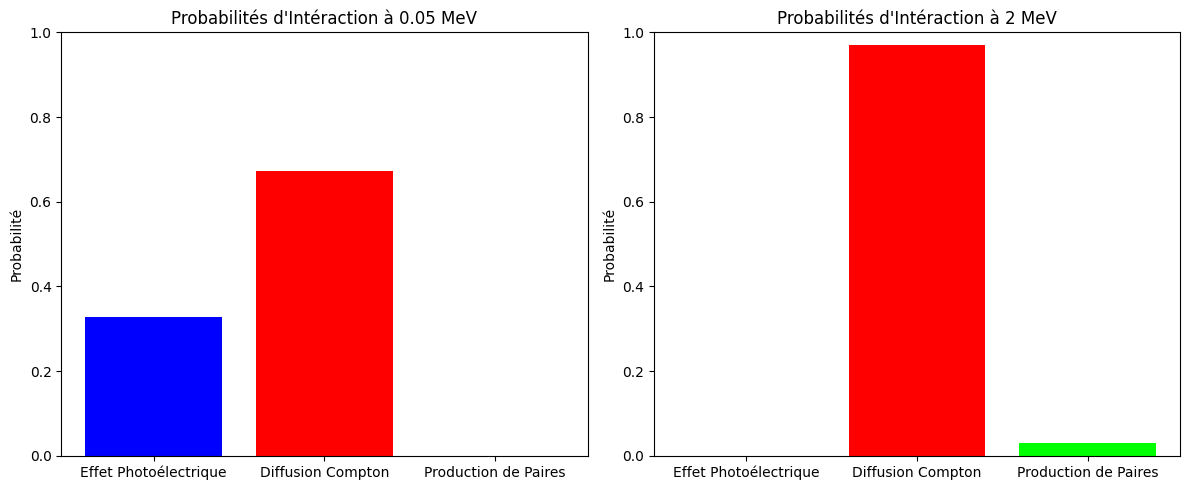

In [19]:
# Fonction pour calculer les probabilités d'interaction pour une énergie de photon donnée
def calculate_interaction_probabilities(photon_energy):
    cross_section_ph = sigma_ph(photon_energy) *n_v
    cross_section_cs = sigma(photon_energy)*n_v
    cross_section_pp = sigma_pair_production(photon_energy)*n_v
    total_cross_section = cross_section_ph + cross_section_cs + cross_section_pp
    # Normaliser les probabilités
    probability_ph = cross_section_ph / total_cross_section
    probability_cs = cross_section_cs / total_cross_section
    probability_pp = cross_section_pp / total_cross_section
    normalized_probabilities = [probability_ph , probability_cs, probability_pp ]
    return normalized_probabilities


# Définir les énergies des photons
photon_energies = [photon_energy_1, photon_energy_2]
# Créer des dictionnaires pour stocker les DataFrames pour chaque énergie
data_frames = {}
for energy in photon_energies:
    normalized_probabilities = calculate_interaction_probabilities(energy)
# Créer un DataFrame pour chaque énergie sans normalisation
    data = {
       'Probabilité d\'Interaction': normalized_probabilities,
       'Interaction': ['Effet Photoélectrique', 'Diffusion Compton', 'Production de Paires']
    }
    df = pd.DataFrame(data)
    if energy == photon_energy_1:
        df1 = df  # Sauvegarder le DataFrame pour l'énergie du photon 1 
    elif energy == photon_energy_2:
        df2 = df  # Sauvegarder le DataFrame pour l'énergie du photon 2
# Créer des sous-graphes pour les graphiques en barres
# Couleurs pour chaque barre (Effet Photoélectrique, Diffusion Compton, Production de Paires)
couleurs = ['#0000FF', '#FF0000', '#00FF00']  

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plotting bar graphs for interaction probabilities at photon energies 1 & 2
axs[0].bar(df1['Interaction'], df1["Probabilité d'Interaction"], color=couleurs)
axs[0].set_title(f"Probabilités d'Intéraction à {photon_energy_1} MeV")
axs[0].set_ylabel('Probabilité')
axs[0].set_ylim(0, 1)

axs[1].bar(df2['Interaction'], df2["Probabilité d'Interaction"], color=couleurs)
axs[1].set_title(f"Probabilités d'Intéraction à {photon_energy_2} MeV")
axs[1].set_ylabel('Probabilité')
axs[1].set_ylim(0, 1)

plt.tight_layout()
plt.show()


#  Échantillonnage des Parcours des Photons

## Distributions de Probabilité en Fonction de la Profondeur

## Fonction de Distribution de Probabilité (PDF) et Fonction de Distribution Cumulative (CDF)

Dans le cadre de la simulation de la profondeur d'interaction, la Fonction de Distribution de Probabilité (PDF) et la Fonction de Distribution Cumulative (CDF) jouent des rôles cruciaux.

### Fonction de Distribution de Probabilité (PDF)
La Fonction de Distribution de Probabilité, notée $P(x)$, représente la probabilité qu'un photon interagisse à une certaine profondeur $x$. Mathématiquement, elle est exprimée par la formule :
$$
 P(x) = e^{-x\mu} \, 
$$

où $\mu$ est le coefficient d'atténuation et $x$ est la profondeur d'interaction. Pour garantir que les probabilités sont normalisées, l'intégrale de la PDF sur toutes les profondeurs possibles doit être égale à 1, comme le montre l'équation de normalisation :
$$
 \int_{0}^{\infty} P(x) \, dx = 1 \,
$$
La probabilité normalisée, servant de PDF pour les interactions des photons, est alors définie par :
$$
 P(x) = \frac{1}{\mu} e^{-x\mu} \, 
$$

### Fonction de Distribution Cumulative (CDF)
La Fonction de Distribution Cumulative, abrégée en CDF, est dérivée de la somme cumulative de la PDF. Elle est définie par :
$$
CDF = 1 - e^{-x\mu}
$$
La CDF est une fonction croissante continue, commençant à **0** pour la profondeur minimale $x_{min}$ et atteignant **1** pour la profondeur maximale $x_{max}$. Elle fournit une distribution de probabilité cumulative, offrant des informations sur la probabilité des interactions des photons à différentes profondeurs.


In [22]:
def calculate_PDF(m,x):
    # Calculate the PDF 
    PDF = m*np.exp(-m * x)
    return PDF

def calculate_CDF(m,x):
    # Calculate the CDF 
    CDF = 1 - np.exp(-m * x)
    return CDF

### Analyse des Interactions pour Deux Énergies de Photon (50 keV et 2 MeV)
Pour mieux comprendre les interactions des photons à différentes profondeurs, la Fonction de Distribution de Probabilité (PDF) et la Fonction de Distribution Cumulative (CDF) ont été tracées en utilisant le coefficient d'atténuation  obtenu à partir de la fonction *total attenuation coefficient*.

La PDF et la CDF ont été calculées et représentées graphiquement pour les énergies de photon de 50 KeV et 2 MeV. L'estimation du coefficient d'atténuation nous permet de visualiser la probabilité des interactions à différentes profondeurs.


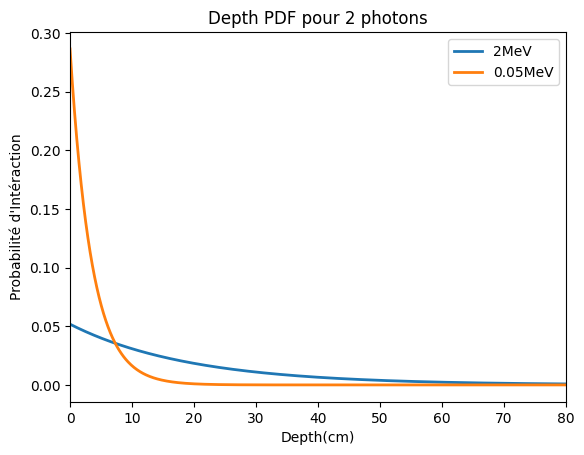

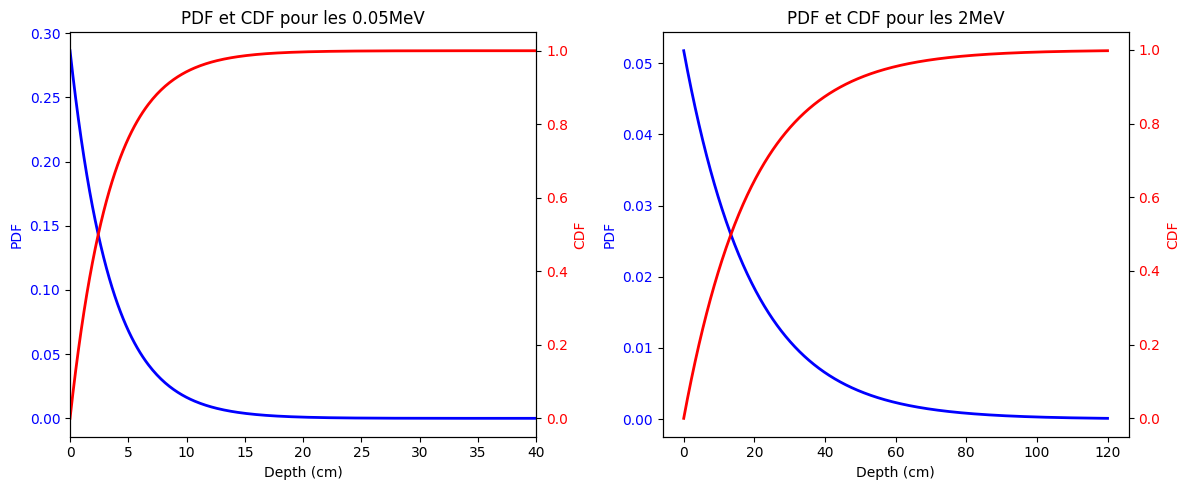

In [23]:
# # Générer des données de Depth
d = np.linspace(0,120,1000) # Pour des énergies de photons plus élevées, vous pouvez utiliser des depths plus grandes
# Calculer la fonction de densité de probabilité (PDF) pour les deux énergies de photons
P_1 = calculate_PDF(m_1,d)
P_2 = calculate_PDF(m_2,d)
# Calculer CDF
y_1 = calculate_CDF(m_1,d)
y_2 = calculate_CDF(m_2,d)

# Tracer les deux PDF ensemble pour visualiser les probabilités d'interaction en fonction de Depth
fig, ax = plt.subplots()
fig  = ax = plt.plot(d, P_2, lw=2.0, label=f'{photon_energy_2}MeV')
ax = plt.plot(d, P_1, lw=2.0, label=f'{photon_energy_1}MeV')
plt.xlabel('Depth(cm)')
plt.ylabel("Probabilité d'Intéraction")
plt.title ('Depth PDF pour 2 photons')
plt.xlim(0,80)
plt.legend()
plt.show()

# Tracer les PDF et CDF pour les deux énergies de photons séparément
fig, (ax1, ax3) = plt.subplots(1, 2, figsize=(12, 5))
# Tracer le PDF et le CDF pour l'énergie de photon 1 
ax1.plot(d, P_1, lw=2.0, label='PDF', color='blue')
ax1.set_xlabel('Depth (cm)')
ax1.set_ylabel('PDF', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax2 = ax1.twinx()
ax2.plot(d, y_1, lw=2.0, label='CDF', color='red')
ax2.set_ylabel('CDF', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax1.set_title(f'PDF et CDF pour les {photon_energy_1}MeV')
ax1.set_xlim(0,40) # Limiter l'axe des X pour plus de clarté
ax2.set_xlim(0,40)
# Tracer le PDF et le CDF pour l'énergie de photon 2
ax3.plot(d, P_2, lw=2.0, label='PDF', color='blue')
ax3.set_xlabel('Depth (cm)')
ax3.set_ylabel('PDF', color='blue')
ax3.tick_params(axis='y', labelcolor='blue')
ax4 = ax3.twinx()
ax4.plot(d, y_2, lw=2.0, label='CDF', color='red')
ax4.set_ylabel('CDF', color='red')
ax4.tick_params(axis='y', labelcolor='red')
ax3.set_title(f'PDF et CDF pour les {photon_energy_2}MeV')
fig.tight_layout()
plt.show()

Dans cette étude, J'ai examiné la probabilité d'interaction des photons en fonction de leur profondeur de pénétration dans un matériau, pour deux niveaux d'énergie distincts : 0.05 MeV et 2 MeV. Ces niveaux d'énergie représentent des scénarios de photons de faible et de haute énergie, respectivement, permettant ainsi une analyse comparative de la pénétration en fonction de l'énergie.

Les **fonctions de densité de probabilité (PDF)** et les **fonctions de distribution cumulative (CDF)** sont utilisées pour visualiser la probabilité d'interaction et de pénétration des photons.

## Résultats

### Comparaison Visuelle des PDFs et CDFs

Les PDFs et CDFs pour les deux énergies (0.05 MeV et 2 MeV) sont tracées ensemble, offrant une **représentation visuelle** claire de la variation de la probabilité d'interaction en fonction de la profondeur. Cette comparaison visuelle permet de mieux comprendre l'impact de l'énergie sur la pénétration des photons dans le matériau.

- **Photons de Faible Énergie (0.05 MeV)** :
  - Présentent une **probabilité d'interaction élevée** près de la surface.
  - La PDF montre une décroissance rapide, indiquant que la plupart des interactions se produisent dans les premiers centimètres de profondeur.
  - La CDF atteint rapidement 1, ce qui confirme que les photons de faible énergie interagissent principalement près de la surface.

- **Photons de Haute Énergie (2 MeV)** :
  - La PDF diminue plus lentement, illustrant une plus grande capacité de pénétration.
  - La CDF atteint 1 à une profondeur plus importante, ce qui indique que les photons de haute énergie interagissent à des profondeurs plus grandes avant d'être complètement atténués.

> ### Interprétation Physique
> Les résultats sont conformes aux attentes théoriques : les photons de faible énergie sont plus susceptibles d'interagir rapidement, ce qui limite leur pénétration. Les photons de haute énergie, en revanche, ont une probabilité d'interaction plus faible par unité de profondeur, ce qui leur permet de pénétrer plus profondément dans le matériau.
 

## Conclusion

En conclusion, cette étude montre clairement que **l'énergie des photons joue un rôle crucial dans la probabilité d'interaction avec le matériau**. Les photons de faible énergie interagissent principalement près de la surface, tandis que ceux de haute énergie sont capables de pénétrer beaucoup plus profondément.

Ces résultats pourraient avoir des implications importantes dans les applications de la **radiothérapie**, où une compréhension précise de la pénétration des photons est essentielle pour optimiser les traitements.


## Méthode de Transformation Inverse de Monte Carlo


La fonction inverse de la fonction de distribution cumulative (CDF), notée $T$, a été utilisée pour la méthode de transformation inverse. Elle est donnée par l'expression analytique suivante :

$$
T = -\frac{1}{\mu} \log(1 - x) \, 
$$
Où $x$ est un nombre aléatoire compris entre 0 et 1.

Les longueurs de pas échantillonnées ont été représentées visuellement à l'aide d'histogrammes. La comparaison de la distribution de pas simulée par Monte Carlo avec le modèle analytique montre une ressemblance étroite, confirmant ainsi la précision de la simulation.

> **Note** : En simulation Monte Carlo, **longueur de pas** désigne la **distance parcourue par une particule avant une interaction**. Ce terme fait référence à la distance réelle qu'une particule se déplace dans un milieu avant de subir une interaction quelconque, comme une diffusion ou une absorption.

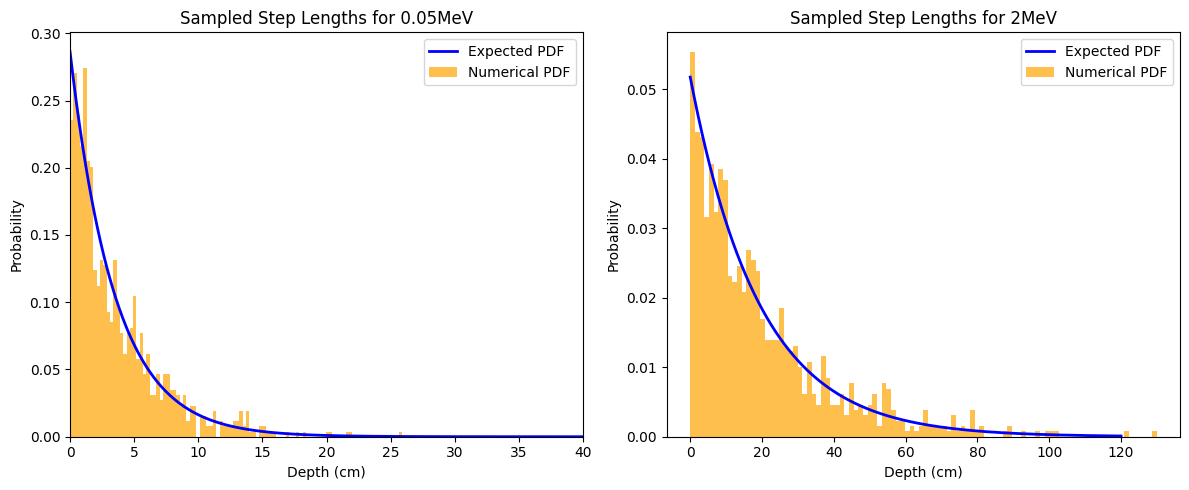

MC Step Length for E = 0.05 MeV is 3.587
Mean Free Path for E = 0.05 MeV is 3.492
MC Step Length for E = 2.00 MeV is 19.747
Mean Free Path for E = 2.00 MeV is 19.321


In [25]:
# expected probability distribution
N = 1000 # Nombre de photons
def calculate_step_length(m, N):  # Fonction pour calculer la longueur de pas basée sur une distribution exponentielle
    t = np.random.uniform(0, 1, N)  # Générer N nombres aléatoires uniformément distribués entre 0 et 1
    y = (1 / (-m)) * (np.log(1 - t))  # Calculer la longueur de pas selon la distribution exponentielle
    return y

s_1 = calculate_step_length(m_1,N)
s_2 = calculate_step_length(m_2,N)

# # Calcul Step Lenghts via la méthode de Monte Carlo
step_1 = np.mean(s_1)
step_2 = np.mean(s_2)


# Créer des sous-graphiques pour les PDF et CDF
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
# Tracer pour E = photon énergie 1
axs[0].plot(d, P_1, lw=2.0, label='Expected PDF', color='blue')
axs[0].hist(s_1, bins=100, density=True, label='Numerical PDF', alpha=0.7, color='orange')
axs[0].set_xlabel('Depth (cm)')
axs[0].set_xlim(0,40) # Limiter l'axe des x entre 0 et 40 cm
axs[0].set_ylabel('Probability')
axs[0].set_title(f'Sampled Step Lengths for {photon_energy_1}MeV')
axs[0].legend()
# Tracer pour E = photon énergie 2
axs[1].plot(d, P_2, lw=2.0, label='Expected PDF', color='blue')
axs[1].hist(s_2, bins=100, density=True, label='Numerical PDF', alpha=0.7, color='orange')
axs[1].set_xlabel('Depth (cm)')
axs[1].set_ylabel('Probability')
axs[1].set_title(f'Sampled Step Lengths for {photon_energy_2}MeV')
axs[1].legend()
plt.tight_layout()
plt.show()

# Afficher les longueurs de pas obtenues via la méthode de Monte Carlo et la longueur libre moyenne
print("MC Step Length for E = {:.2f} MeV is {:.3f}".format(photon_energy_1, step_1))
print("Mean Free Path for E = {:.2f} MeV is {:.3f}".format(photon_energy_1, 1/m_1))

print("MC Step Length for E = {:.2f} MeV is {:.3f}".format(photon_energy_2, step_2))
print("Mean Free Path for E = {:.2f} MeV is {:.3f}".format(photon_energy_2, 1/m_2))


### Estimation et Comparaison des steps length de 50 KeV et 2MeV

En complément, la longueur de pas de Monte Carlo a été estimée en calculant la valeur moyenne des données générées. Cette valeur a ensuite été comparée au libre parcours moyen analytique des photons (Mean Free Path, MFP).

- **Résultats**

Pour les énergies de 50 keV et de 2 MeV :
- Les longueurs de pas estimées par Monte Carlo étaient respectivement de **3,556 cm** et **19,132 cm**.  
  **(Remarque : ces valeurs varient à chaque exécution de la simulation.)**
- Les libres parcours moyens analytiques étaient respectivement de **3,492 cm** et **19,321 cm**.

La comparaison indique un haut degré de précision dans la simulation de Monte Carlo, car les longueurs de pas estimées correspondent de près aux attentes analytiques. La faible déviation par rapport aux valeurs attendues confirme la fiabilité des résultats de la simulation.


- **Conclusion**

L'analyse des résultats montre que la simulation de Monte Carlo produit des valeurs de longueurs de pas qui correspondent étroitement aux valeurs analytiques théoriques. Les faibles écarts observés entre les valeurs estimées et les valeurs attendues valident la précision et la fiabilité de cette méthode pour simuler les parcours moyens des photons dans le milieu étudié.


# Calcul de l'Énergie des Photons Diffusés


Dans la simulation des trajectoires des photons, il est crucial de prendre en compte que la diffusion Compton est la seule interaction qui ne retire pas entièrement le photon du faisceau. Lors de la diffusion Compton, le photon perd de l'énergie, et la relation entre les énergies est donnée par :

$$
E = \frac{E_0}{1 + \left(\frac{E_0}{m_0c^2}\right) \cdot \left(1 - \cos(\theta)\right)}
$$

Où $E_0$ est l'énergie initiale du photon, $m_0 c^2$ est l'énergie au repos de l'électron, et $\theta$ est l'angle de diffusion.

Cette formule a été utilisée pour calculer et visualiser la perte d'énergie pour les deux énergies de photons en fonction de l'angle.


In [28]:
# Conversion de l'angle de degrés en radians
ang_conv = np.pi / 180  # Conversion pour convertir les degrés en radians (1 degré = π/180 radians)

# Définir les angles de diffusion de 0° à 180° (en degrés) et les convertir en radians
th = np.linspace(0, 180, 180)  # Générer 180 valeurs d'angles entre 0 et 180°
th = th * ang_conv  # Conversion des angles en radians

# Fonction pour calculer l'énergie du photon diffusé en fonction de l'énergie initiale (en) et de l'angle de diffusion (th)
def ens(en, th):
    # Formule de la diffusion Compton pour l'énergie du photon diffusé
    # f = en / (1 + ((en / moc2) * (1 - np.cos(th))))  # C'est la version commentée de la formule
    f = 1 + ((en / moc2) * (1 - np.cos(th)))  # Calcul de la fonction f pour la diffusion Compton
    return en / f  # Retourner l'énergie du photon diffusé (en / f) 


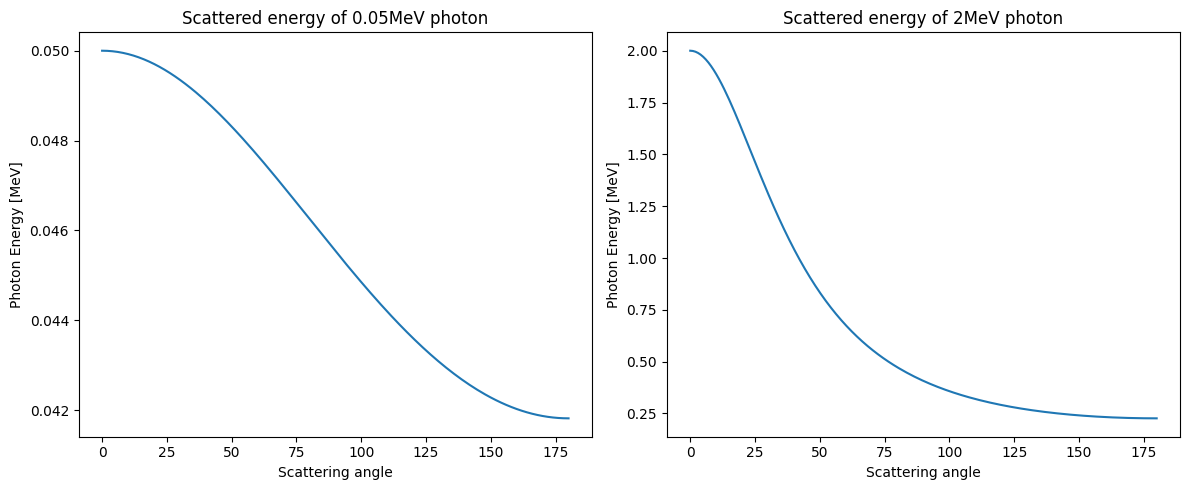

In [31]:
# Create a subplot pour les deux E1 / E2
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Tracer pour E = photon énergie 1
axs[0].plot(th / ang_conv, ens(photon_energy_1, th))
axs[0].set_xlabel('Scattering angle')
axs[0].set_ylabel('Photon Energy [MeV]')
axs[0].set_title(f'Scattered energy of {photon_energy_1}MeV photon')


# Tracer pour E = photon énergie 2
axs[1].plot(th / ang_conv, ens(photon_energy_2, th))
axs[1].set_xlabel('Scattering angle')
axs[1].set_ylabel('Photon Energy [MeV]')
axs[1].set_title(f'Scattered energy of {photon_energy_2}MeV photon')
plt.tight_layout()
plt.show()

Les graphiques montrent la diminution de l'énergie des photons en fonction de l'angle de diffusion pour deux énergies : **0,05 MeV** et **2 MeV**.

- **0,05 MeV** : L'énergie diminue légèrement de **0,05 MeV** à environ **0,042 MeV** lorsque l'angle passe de **0°** à **180°**.
- **2 MeV** : L'énergie baisse fortement de **2 MeV** à environ **0,2 MeV** pour des angles similaires, montrant une perte d'énergie plus importante.

**Conclusion** :
La diminution de l'énergie des photons avec l'augmentation de l'angle est due à l'effet Compton, où les photons perdent plus d'énergie à mesure que l'angle de diffusion augmente, particulièrement visible pour les photons de haute énergie (2 MeV).

# Échantillonnage des angles de diffusion Compton



#  Section Efficace Différentielle Normalisée

La section efficace différentielle pour la diffusion Compton, notée $d\sigma/d\theta$, est exprimée en fonction de l'énergie du photon et de l'angle de diffusion $𝜃$. L'équation est donnée par :

$$
\frac{d\sigma}{d\theta} = \frac{r_0^2}{2} \left(\frac{h\nu'}{h\nu}\right)^2 \left[\frac{h\nu}{h\nu'} + \frac{h\nu'}{h\nu} - \sin^2(\theta)\right] \sin(\theta) \quad 
$$

Cette fonction décrit la distribution angulaire des photons diffusés. Ici, $h\nu$ représente l'énergie initiale du photon, $h\nu'$ est l'énergie du photon diffusé, et $\theta$ est l'angle de diffusion. La fonction est normalisée en fonction de la valeur maximale numériquement obtenue de la section efficace différentielle. La section efficace différentielle normalisée $\frac{d\sigma}{d\theta}$ en fonction de $\theta$ est représentée visuellement pour les deux énergies de photons.


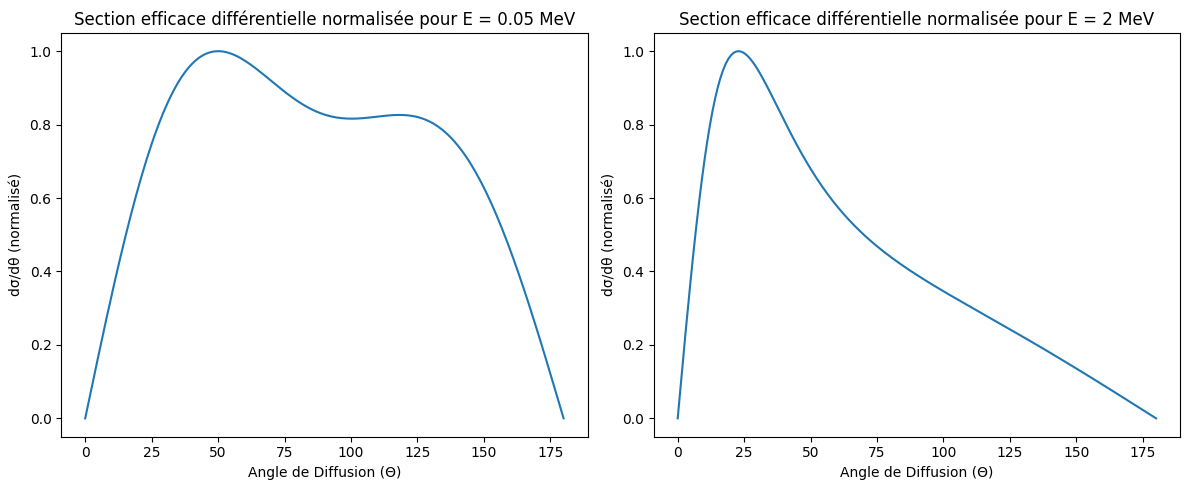

In [32]:
# Simuler les angles de diffusion
th = np.linspace(0, 180, 180)  # Créer une gamme d'angles de 0 à 180 degrés
th = th * ang_conv  # Convertir les angles en radians pour le calcul

# Fonction pour calculer la section efficace différentielle normalisée pour la diffusion Compton
def dsdo(en, th):
    enpp = ens(en, th)  # Calculer l'énergie transférée avec la fonction ens
    f1 = (enpp / en) ** 2  # Calcul de la première partie de la formule de la section efficace
    f2 = ((enpp / en) + (en / enpp) - (np.sin(th) ** 2)) * np.sin(th)  # Calcul de la seconde partie de la formule
    f = ((re ** 2) / 2) * f1 * f2  # Combinaison des termes pour obtenir la section efficace
    return f

# Normalisation de la section efficace différentielle
DCS1 = dsdo(photon_energy_1, th)  # Calculer la section efficace pour l'énergie des photons 1
DCS2 = dsdo(photon_energy_2, th)  # Calculer la section efficace pour l'énergie des photons 2

NDCS1 = DCS1 * (1 / max(DCS1))  # Normaliser DCS1 pour obtenir NDCS1
NDCS2 = DCS2 * (1 / max(DCS2))  # Normaliser DCS2 pour obtenir NDCS2

# Créer une sous-figure pour les deux graphiques de la section efficace différentielle normalisée
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Graphique pour E = énergie des photons 1
axs[0].plot(th / ang_conv, NDCS1)  # Tracer la section efficace normalisée en fonction de l'angle de diffusion
axs[0].set_xlabel('Angle de Diffusion (Θ)')  # Étiquette de l'axe X
axs[0].set_ylabel('dσ/dθ (normalisé)')  # Étiquette de l'axe Y
axs[0].set_title(f'Section efficace différentielle normalisée pour E = {photon_energy_1} MeV')  # Titre du graphique

# Graphique pour E = énergie des photons 2
axs[1].plot(th / ang_conv, NDCS2)  # Tracer la section efficace normalisée pour la seconde énergie
axs[1].set_xlabel('Angle de Diffusion (Θ)')
axs[1].set_ylabel('dσ/dθ (normalisé)')
axs[1].set_title(f'Section efficace différentielle normalisée pour E = {photon_energy_2} MeV')

plt.tight_layout()  # Ajuster l'espacement entre les sous-graphes pour éviter le chevauchement
plt.show()

Les graphiques montrent la diminution de l'énergie des photons en fonction de l'angle de diffusion pour deux énergies : **0,05 MeV** et **2 MeV**.

- **0,05 MeV** : L'énergie diminue légèrement de **0,05 MeV** à environ **0,042 MeV** lorsque l'angle passe de **0°** à **180°**.
- **2 MeV** : L'énergie baisse fortement de **2 MeV** à environ **0,2 MeV** pour des angles similaires, montrant une perte d'énergie plus importante.

#### Conclusion :
La diminution de l'énergie des photons avec l'augmentation de l'angle est due à l'effet Compton, où les photons perdent plus d'énergie à mesure que l'angle de diffusion augmente, particulièrement visible pour les photons de haute énergie (2 MeV).


Les graphiques montrent la section différentielle normalisée de l'effet Compton en fonction de l'angle de diffusion pour deux énergies de photons : **0,05 MeV** et **2 MeV**.

#### Graphique de gauche (E = 0,05 MeV)
- **Comportement** : La section différentielle augmente rapidement pour atteindre un maximum autour de **50°**, puis diminue progressivement.
- **Observation** : La courbe présente une forme légèrement ondulée après le maximum, suggérant une certaine variabilité dans la probabilité de diffusion à des angles moyens.

#### Graphique de droite (E = 2 MeV)
- **Comportement** : La section différentielle atteint un maximum plus tôt, vers **25°**, et diminue ensuite de manière plus linéaire jusqu'à **180°**.
- **Observation** : La diminution est plus prononcée par rapport au photon de **0,05 MeV**, ce qui indique une probabilité de diffusion avant pour des angles plus faibles, typique des photons de haute énergie.

### Conclusion
- À basse énergie (0,05 MeV), la diffusion Compton est plus probable autour des angles moyens (~50°).
- À haute énergie (2 MeV), la diffusion est favorisée à des angles plus petits, avec une probabilité décroissante pour des angles plus grands.
- **Ces observations m'ont permis de conclure que plus l'énergie du photon est élevée, plus la diffusion est concentrée vers l'avant, ce qui est caractéristique de l'effet Compton.**


# Échantillonnage par Rejet MC



La technique de rejet a été utilisée pour échantillonner les angles de diffusion pour les deux énergies de photons. La section efficace différentielle normalisée $d\sigma/d\theta$, qui sert de fonction de distribution de probabilité (PDF) pour les angles de diffusion, n'a pas d'inverse bien défini, donc la méthode d'acceptation/rejet a dû être mise en œuvre pour simuler les angles de diffusion. Dans la simulation Monte Carlo, des nombres aléatoires ont été générés comme entrées pour la fonction de la section efficace différentielle, et ces valeurs ont été comparées avec les valeurs réelles de la distribution. Si les valeurs générées respectaient la distribution, elles étaient acceptées ; sinon, elles étaient rejetées.

Les données échantillonnées résultantes ont été tracées par rapport à leur fonction de distribution de probabilité (PDF) respective afin de représenter visuellement l'efficacité de la technique de rejet pour capturer avec précision les angles de diffusion attendus.


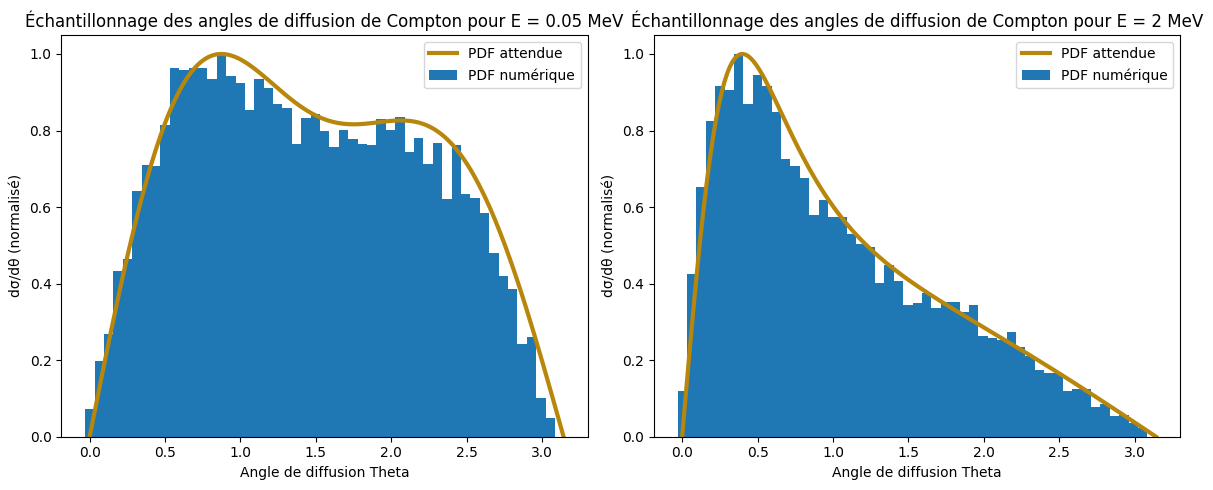

In [34]:
# Définir la fonction pour échantillonner les angles de diffusion
def sampling_scattering_angles(photon_energy, num_photons):
    # Calculer la section efficace différentielle normalisée (NDCS)
    DCS = dsdo(photon_energy, th)
    NDCS = DCS * (1 / np.max(DCS))  # Normaliser DCS

    # Initialiser un tableau pour stocker les angles de diffusion échantillonnés
    theta = np.zeros(num_photons)
    scat_max = NDCS.max()  # Obtenir la valeur maximale de la section efficace

    # Compteur pour suivre le nombre d'angles générés
    counter = 0
    while True:
        x = counter
        # Arrêter la boucle lorsque le nombre d'angles souhaité est atteint
        if counter == num_photons:
            break

        # Générer un angle de diffusion aléatoire dans la plage [0, π]
        rand_theta = np.random.uniform(0, pi, 1)
        # Calculer la section efficace différentielle normalisée pour l'angle aléatoire
        vcsd = dsdo(photon_energy, rand_theta) * (1 / max(DCS))
        # Générer un nombre aléatoire pour la condition d'acceptation
        rand = np.random.uniform(0, scat_max, 1)

        # Vérifier si l'angle est accepté selon la condition
        if rand <= vcsd:
            theta[x] = rand_theta  # Ajouter l'angle au tableau
            counter += 1  # Incrémenter le compteur

    return theta

# Échantillonner les angles de diffusion pour deux énergies de photons différentes
theta_A = sampling_scattering_angles(photon_energy_1, 10**4)
theta_B = sampling_scattering_angles(photon_energy_2, 10**4)

# Créer des histogrammes pour visualiser les angles de diffusion échantillonnés
hist_A, bins = np.histogram(theta_A, bins=50, density=True)
hist_B, bins = np.histogram(theta_B, bins=50, density=True)
# Normaliser les valeurs de l'histogramme en fonction de la fréquence
hist_A_normalized = hist_A / np.max(hist_A)
hist_B_normalized = hist_B / np.max(hist_B)

# Tracer les angles de diffusion de Compton et la PDF attendue pour les deux énergies de photons
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Graphique pour E = énergie du photon 1
axs[0].plot(th, NDCS1, lw=3.0, label='PDF attendue', color='darkgoldenrod')  # Tracer la PDF attendue
axs[0].bar(bins[:-1], hist_A_normalized, width=bins[1] - bins[0], label='PDF numérique')  # Tracer l'histogramme
axs[0].set_xlabel('Angle de diffusion Theta')  # Étiquette de l'axe X
axs[0].set_ylabel('dσ/dθ (normalisé)')  # Étiquette de l'axe Y
axs[0].set_title(f'Échantillonnage des angles de diffusion de Compton pour E = {photon_energy_1} MeV')
axs[0].legend()

# Graphique pour E = énergie du photon 2
axs[1].plot(th, NDCS2, lw=3.0, label='PDF attendue', color='darkgoldenrod')  # Tracer la PDF attendue
axs[1].bar(bins[:-1], hist_B_normalized, width=bins[1] - bins[0], label='PDF numérique')  # Tracer l'histogramme
axs[1].set_xlabel('Angle de diffusion Theta')
axs[1].set_ylabel('dσ/dθ (normalisé)')
axs[1].set_title(f'Échantillonnage des angles de diffusion de Compton pour E = {photon_energy_2} MeV')
axs[1].legend()

plt.tight_layout()  # Ajuster l'espacement pour éviter le chevauchement
plt.show()

#  Simulation du parcours des photons

## Transformation du Système de Référence

En utilisant les techniques Monte Carlo (MC), nous avons généré des longueurs de pas de photons et des angles de diffusion Compton pour des photons de différentes énergies. Cependant, les informations sur les trajectoires sont actuellement représentées dans le cadre de référence du photon et non dans le cadre de référence du laboratoire.

Pour y remédier, la **transformation de récurrence** a été utilisée pour simuler les trajectoires des photons dans l'eau. Les fonctions générées précédentes ont été utilisées dans le code. De plus, pour l'échantillonnage des angles azimutaux, la symétrie cylindrique a été supposée, et des nombres aléatoires provenant d'une distribution uniforme ont été obtenus pour la plage de $0$ à $2\pi$. La transformation de récurrence est définie comme le changement de cadre de référence du cadre du photon au cadre du laboratoire et est exprimée comme suit :

$$
\cos(\theta_{n+1}) = \sin(\theta_s)\cos(\phi_s)\sin(\theta_n) + \cos(\theta_s)\cos(\theta_n) \quad 
$$

$$
\sin(\phi_{(n+1)} - \phi_n) = \frac{-\sin(\theta_s)\sin(\phi_s)}{\sin(\theta_{(n+1)})} \quad 
$$

Cela inclut la mise à jour des angles de diffusion et azimutaux, ainsi que des positions dans le système de coordonnées $x$, $y$, $z$. Ici, l'indice $n$ est utilisé pour définir les nouveaux angles transformés dans le cadre de référence du laboratoire, et l'indice $s$ correspond au cadre de référence du photon. En utilisant les angles diffusés et azimutaux transformés, la position du photon a été sauvegardée et mise à jour dans un système de coordonnées \(x, y, z\) :

$$
x_{(n+1)} = x_n + \Delta S \sin(\theta_{(n+1)})\cos(\phi_{(n+1)}) \quad 
$$

$$
y_{(n+1)} = y_n + \Delta S \sin(\theta_{(n+1)})\sin(\phi_{(n+1)}) \quad 
$$

$$
z_{(n+1)} = z_n + \Delta S \cos(\theta_{(n+1)}) \quad 
$$


In [40]:
"""Cette fonction calcule la transformation de l'angle de diffusion en fonction 
des angles d'azimut initial (fi) et de diffusion (thn) """
def rec(th, fi, thn):   # Calcul de la projection du vecteur de diffusion dans l'axe x-y avec des sinus et cosinus des angles
    t1 = np.sin(th) * np.cos(fi) * np.sin(thn)  # Projection dans la direction x-y
    t2 = np.cos(th) * np.cos(thn) # Projection dans la direction z
    t3 = t1 + t2  # Somme des projections
    t = np.arccos(t3) # Calcul de l'angle entre les vecteurs après transformation
    return t   # Retourne le nouvel angle transformé

# Cette fonction calcule l'angle azimutal après une transformation
def azi(th, fi, thn, fi_old):
    # Calcul de la projection dans l'axe x
    g1 = -(np.sin(th) * np.sin(fi))  # Projection sur l'axe x
    g2 = np.sin(thn)  # Sinus de l'angle de diffusion final
    g3 = g1 / g2  # Diviser la projection x par la projection z
    g4 = np.arcsin(g3)  # Calcul de l'angle azimutal final
    g = g4 + fi_old  # Correction en ajoutant l'angle azimutal initial
    return g  # Retourne le nouvel angle azimutal

# Cette fonction calcule la nouvelle position 𝑋 après transformation en fonction de l'angle de diffusion et de l'azimut.
def xpos(x, thn, fi):
    xn = x + (Mov * np.sin(thn) * np.cos(fi))
    return float(xn) # Retourne la nouvelle position X en tant que nombre flottant

# Cette fonction calcule la nouvelle position 𝑌 après transformation en fonction des mêmes angles.
def ypos(y, thn, fi):
    yn = y + (Mov * np.sin(thn) * np.sin(fi))
    return float(yn) # Retourne la nouvelle position Y en tant que nombre flottant

# Cette fonction calcule la nouvelle position 𝑍 en fonction de l'angle de diffusion.
def zpos(z, thn):
    zn = z + (Mov * np.cos(thn))
    return float(zn) # Retourne la nouvelle position Z en tant que nombre flottant

## Simulation des Trajectoires des Photons dans l'Eau

Ce code effectue une simulation des trajectoires des photons dans un milieu d'eau, en se concentrant sur leurs interactions lors de leur traversée. La simulation utilise toutes les fonctions discutées ci-dessus pour modéliser divers aspects du comportement des photons dans le milieu donné.

La simulation commence avec les photons entrant dans le système et se dirigeant vers l'axe Z positif. Une position initiale de Z=0 est imposée, tandis que les coordonnées initiales X et Y sont choisies de manière aléatoire dans une plage de -1 à 1 cm.

### Paramètres de la Simulation
- **Nombre de Photons Simulés (N) :** 1000
- **Énergie de Coupure (Ecut) :** 0,02 MeV (20 keV)
- **Longueur de Pas de Voyage :** 2 cm

### Probabilité d'Interaction
- Le coefficient d'atténuation des photons est calculé à chaque point, influençant la génération des longueurs de pas des photons.
- Les longueurs de pas des photons Monte Carlo sont utilisées pour calculer la probabilité d'interaction tous les 2 cm.
- Un nombre aléatoire est utilisé pour déterminer si les photons interagissent ou non.
- Si aucune interaction ne se produit, la profondeur du photon (Z) augmente de 2 cm, tandis que les coordonnées X, Y et l'énergie du photon restent inchangées.

### Mécanismes d'Interaction
- Pour les photons qui interagissent, le type d'interaction est simulé, en tenant compte du fait que l'effet photoélectrique et la production de paires entraînent la suppression du photon du système.
- Les probabilités d'interaction sont estimées en fonction de l'énergie du photon.
- Un nombre aléatoire est utilisé pour déterminer si la diffusion Compton se produit. Si ce n'est pas le cas, l'énergie du photon est réduite à zéro, mettant ainsi fin à sa trajectoire.

### Diffusion Compton
- Si la diffusion Compton se produit, l'angle de diffusion est déterminé par la simulation.
- Les angles de diffusion sont échantillonnés en fonction de la distribution de probabilité des angles de diffusion.
- Un angle aléatoire est choisi parmi les données de Monte Carlo et la perte d'énergie du photon est estimée en fonction de l'énergie initiale du photon et de l'angle de diffusion.

### Transformation de Récurrence
- La simulation utilise la transformation de récurrence pour mettre à jour la position du photon.
- Les angles de diffusion, les angles azimutaux et les longueurs de pas sont utilisés dans les fonctions décrites ci-dessus.

### Boucle de Simulation
- Chaque photon est simulé jusqu'à ce que son énergie soit inférieure à l'énergie de coupure.
- Après chaque interaction, les nouvelles positions X, Y, Z, ainsi que l'énergie du photon, sont calculées et sauvegardées.
- Si la nouvelle énergie est supérieure à l'énergie de coupure, la simulation continue.

### Résultats de la Simulation
- Deux ensembles de simulations sont réalisés avec différentes énergies initiales des photons.
- Les trajectoires des photons, comprenant les coordonnées X, Y, Z et l'énergie, sont stockées pour analyse et comparaison.


In [42]:
# Paramètres de simulation
N = 1000  # Nombre de photons simulés
Ecut = 0.02  # Énergie de coupure en MeV
Mov = 2  # Longueur du pas de déplacement en cm (déplacement par intervalles de 2 cm)

# Tableaux pour stocker les chemins des photons
x1, y1, z1, E1 = [], [], [], []  # Pour énergie photonique 1
x2, y2, z2, E2 = [], [], [], []  # Pour énergie photonique 2

# Boucle pour simuler les chemins des photons avec photon_energy_1
for n in range(N):
    # Initialiser les listes pour chaque photon
    x, y, z, E = [], [], [], []
    i = 0  # Compteur de l'étape actuelle
    thn = []  # Liste des angles de scattering
    thn_1 = 0  # Angle de scattering initial
    fi_old = np.random.uniform(0, 2 * np.pi)  # Angle azimutal initial aléatoire
    xi = np.random.uniform(-1, 1)  # Position initiale en X
    yi = np.random.uniform(-1, 1)  # Position initiale en Y
    x.append(xi)  # Ajouter la position initiale en X
    y.append(yi)  # Ajouter la position initiale en Y
    z.append(0)  # Initialiser Z à 0
    E.append(photon_energy_1)  # Ajouter l'énergie initiale du photon
    thn.append(thn_1)  # Ajouter l'angle de scattering initial

    # Tant que l'énergie du photon est au-dessus de l'énergie de coupure
    while E[i] > Ecut:
        # Calculer la probabilité d'interaction
        b_1 = total_attenuation_coefficient(E[i])  # Coefficient d'atténuation
        m = b_1[0]  # Obtenir l'atténuation du photon
        sl = calculate_step_length(m, 100)  # Générer des longueurs de pas
        Prob = random.choice(sl)  # Sélectionner une longueur de pas aléatoire
        a = np.random.uniform(0, Mov)  # Générer une valeur pour décider de l'interaction
        
        if a < Prob:  # Si le photon ne subit pas d'interaction
            z.append(z[i] + Mov)  # Déplacer le photon en Z
            x.append(x[i])  # Garder la position en X
            y.append(y[i])  # Garder la position en Y
            E.append(E[i])  # Garder la même énergie
            thn.append(thn[i])  # Garder le même angle de scattering

        else:  # Si le photon interagit
            int_prob = calculate_interaction_probabilities(E[i])  # Calculer les probabilités d'interaction
            cm_prob = int_prob[1]  # Obtenir la probabilité de diffusion Compton
            p = np.random.uniform(0, 1)  # Générer un nombre aléatoire pour décider l'interaction

            if p > cm_prob:  # Si le photon n'interagit pas par Compton
                E[i] = 0  # Mettre l'énergie à 0 (le photon est enlevé du système)
                z.append(z[i])
                x.append(x[i])
                y.append(y[i])
                E.append(E[i])

            else:  # Si le photon interagit par Compton
                theta = sampling_scattering_angles(E[i], 100)  # Échantillonner un angle de diffusion
                th_photon = random.choice(theta)  # Choisir un angle de scattering aléatoire
                fi_photon = np.random.uniform(0, 2 * np.pi, 1)  # Générer un angle azimutal aléatoire
                E.append(ens(E[i], np.random.uniform(0, 1)))  # Calculer l'énergie après l'interaction avec un nombre aléatoire
                # Calculer la transformation en angles
                thn_old = thn[i]
                thn_new = rec(th_photon, fi_photon, thn_old)  # Mettre à jour thn
                thn.append(thn_new)  # Ajouter le nouvel angle
                fi_new = azi(th_photon, fi_photon, thn_new, fi_old)  # Calculer le nouvel angle azimutal
                fi_old = fi_new  # Mettre à jour fi_old
                # Calculer les nouvelles positions
                x.append(xpos(x[i], thn_new, fi_new))
                y.append(ypos(y[i], thn_new, fi_new))
                z.append(zpos(z[i], thn_new))
        
        i += 1  # Incrémenter l'étape
    # Enregistrer les chemins pour chaque photon
    x1.append(x)
    y1.append(y)
    z1.append(z)
    E1.append(E)

# Code similaire pour photon_energy_2
for n in range(N):
    x, y, z, E = [], [], [], []
    i = 0
    thn = []
    fi_old = np.random.uniform(0, 2 * np.pi)
    xi = np.random.uniform(-1, 1)
    yi = np.random.uniform(-1, 1)
    x.append(xi)
    y.append(yi)
    z.append(0)
    thn.append(thn_1)
    E.append(photon_energy_2)

    while E[i] > Ecut:
        b_1 = total_attenuation_coefficient(E[i])
        m = b_1[0]
        sl = calculate_step_length(m, 100)
        Prob = random.choice(sl)
        a = np.random.uniform(0, Mov)

        if a < Prob:
            z.append(z[i] + Mov)
            x.append(x[i])
            y.append(y[i])
            E.append(E[i])
            thn.append(thn[i])

        else:
            int_prob = calculate_interaction_probabilities(E[i])
            cm_prob = int_prob[1]
            p = np.random.uniform(0, 1)
            if p > cm_prob:
                E[i] = 0
                z.append(z[i])
                x.append(x[i])
                y.append(y[i])
                E.append(E[i])
            else:
                theta = sampling_scattering_angles(E[i], 100)
                th_photon = random.choice(theta)
                fi_photon = np.random.uniform(0, 2 * np.pi, 1)
                E.append(ens(E[i], np.random.uniform(0, 1)))  # Utiliser un nombre aléatoire directement ici aussi
                thn_old = thn[i]
                thn_new = rec(th_photon, fi_photon, thn_old)
                thn.append(thn_new)
                fi_new = azi(th_photon, fi_photon, thn_new, fi_old)
                fi_old = fi_new
                x.append(xpos(x[i], thn_new, fi_new))
                y.append(ypos(y[i], thn_new, fi_new))
                z.append(zpos(z[i], thn_new))

        i += 1
    x2.append(x)
    y2.append(y)
    z2.append(z)
    E2.append(E)



# Conclusion and Visualisations


Dans cette partie spécialisée sur la visualisation, je plonge dans le domaine fascinant des trajectoires des faisceaux de photons, offrant une vue détaillée de leur activité à travers différentes plages d'énergie. Cette enquête visuelle constitue un élément clé de cette simulation plus large, révélant l'interaction complexe des photons lorsqu'ils traversent le milieu. 

Les trajectoires des photons pour 1000 photons d'énergie 50 keV et 2 MeV sont présentées sous forme de graphiques plans x-z, y-z et x-y.


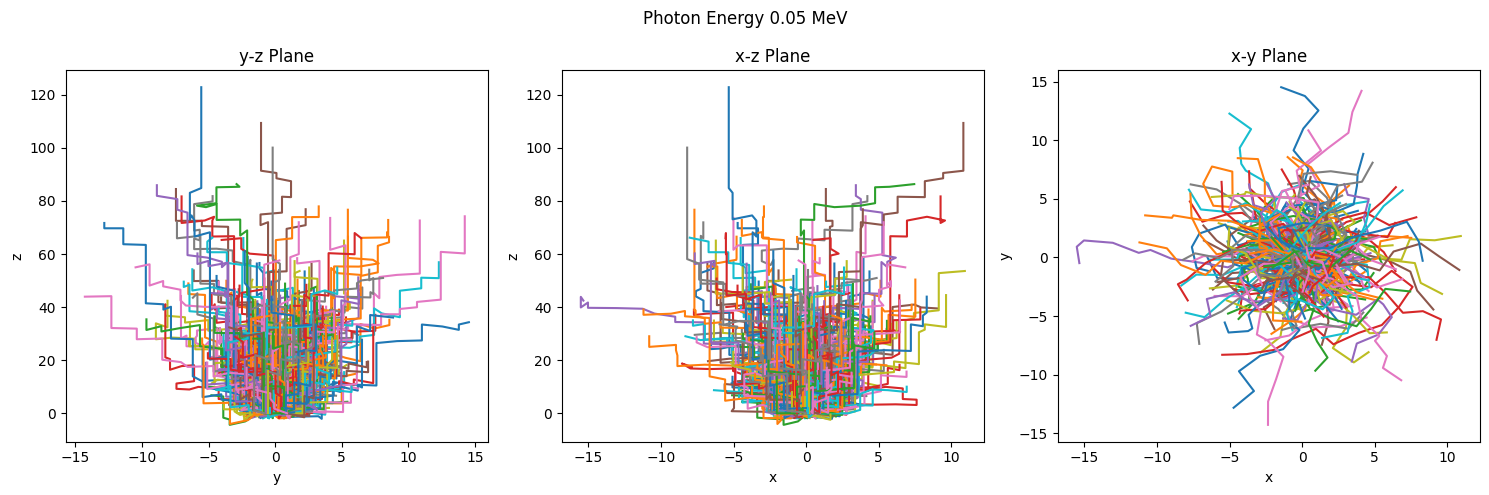

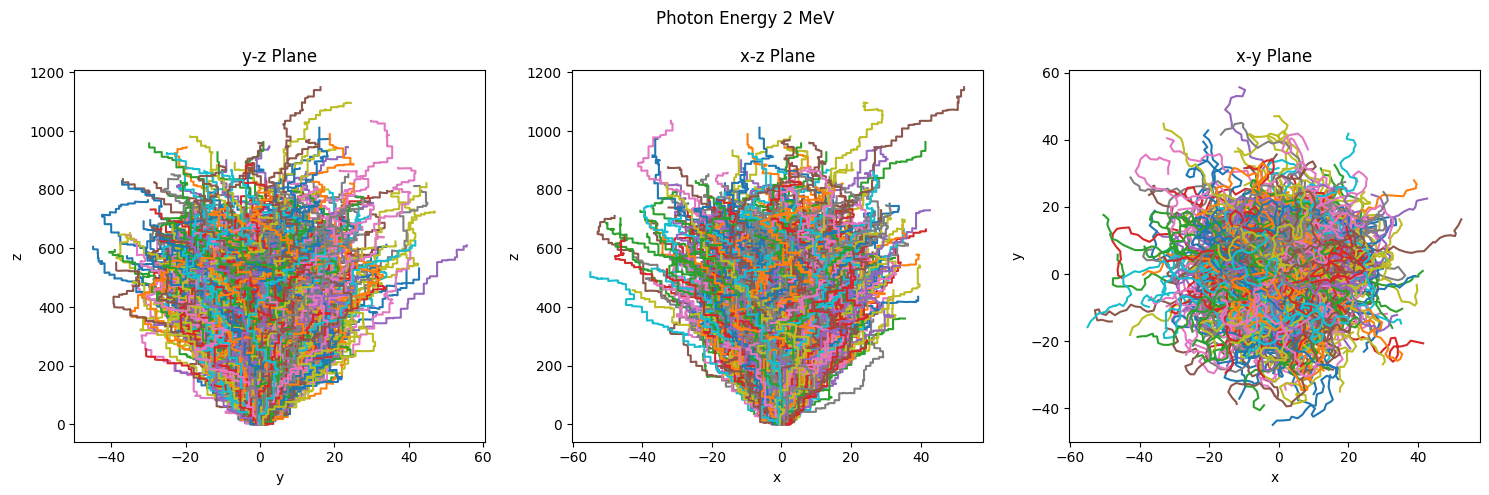

In [44]:


# Créer un graphique avec 1 ligne et 3 colonnes
fig, axs = plt.subplots(1, 3, figsize=(15, 5))  # Spécifier la taille de la figure

# Tracer les trajectoires des photons dans le plan y-z pour photon_energy_1
for n in range(N):  # Boucle pour chaque photon
    axs[0].plot(y1[n], z1[n])  # Tracer y vs z pour chaque photon

# Ajouter des étiquettes et un titre pour le plan y-z
axs[0].set_xlabel('y')
axs[0].set_ylabel('z')
axs[0].set_title('y-z Plane')

# Tracer les trajectoires des photons dans le plan x-z pour photon_energy_1
for n in range(N):
    axs[1].plot(x1[n], z1[n])  # Tracer x vs z pour chaque photon

# Ajouter des étiquettes et un titre pour le plan x-z
axs[1].set_xlabel('x')
axs[1].set_ylabel('z')
axs[1].set_title('x-z Plane')

# Tracer les trajectoires des photons dans le plan x-y pour photon_energy_1
for n in range(N):
    axs[2].plot(x1[n], y1[n])  # Tracer x vs y pour chaque photon

# Ajouter des étiquettes et un titre pour le plan x-y
axs[2].set_xlabel('x')
axs[2].set_ylabel('y')
axs[2].set_title('x-y Plane')

# Ajouter un titre général à la figure
fig.suptitle(f'Photon Energy {photon_energy_1} MeV')

# Organiser l'agencement des sous-graphes pour éviter les chevauchements
plt.tight_layout()

# Afficher le graphique
plt.show()


# Plotting pour Photon Energy 2 (similaire à la section ci-dessus mais pour photon_energy_2)

# Créer un graphique avec 1 ligne et 3 colonnes
fig, axs = plt.subplots(1, 3, figsize=(15, 5))  # Spécifier la taille de la figure

# Tracer les trajectoires des photons dans le plan y-z pour photon_energy_2
for n in range(N):  # Boucle pour chaque photon
    axs[0].plot(y2[n], z2[n])  # Tracer y vs z pour chaque photon

# Ajouter des étiquettes et un titre pour le plan y-z
axs[0].set_xlabel('y')
axs[0].set_ylabel('z')
axs[0].set_title('y-z Plane')

# Tracer les trajectoires des photons dans le plan x-z pour photon_energy_2
for n in range(N):
    axs[1].plot(x2[n], z2[n])  # Tracer x vs z pour chaque photon

# Ajouter des étiquettes et un titre pour le plan x-z
axs[1].set_xlabel('x')
axs[1].set_ylabel('z')
axs[1].set_title('x-z Plane')

# Tracer les trajectoires des photons dans le plan x-y pour photon_energy_2
for n in range(N):
    axs[2].plot(x2[n], y2[n])  # Tracer x vs y pour chaque photon

# Ajouter des étiquettes et un titre pour le plan x-y
axs[2].set_xlabel('x')
axs[2].set_ylabel('y')
axs[2].set_title('x-y Plane')

# Ajouter un titre général à la figure
fig.suptitle(f'Photon Energy {photon_energy_2} MeV')

# Organiser l'agencement des sous-graphes pour éviter les chevauchements
plt.tight_layout()

# Afficher le graphique
plt.show()

Dans cette simulation des trajectoires des photons dans un milieu aqueux, on observe clairement l'influence de l'énergie des photons sur leur comportement :

- **Énergie faible (0,05 MeV)** : Les photons montrent des trajectoires courtes avec une interaction fréquente avec le milieu. Cela entraîne une pénétration limitée en profondeur et une dispersion latérale importante.
- **Énergie élevée (2 MeV)** : Les photons traversent le milieu avec une pénétration beaucoup plus profonde et une dispersion accrue. Les trajectoires sont plus longues, indiquant moins d'interactions initiales.

En résumé, l'énergie des photons joue un rôle crucial dans leur capacité de pénétration et de diffusion dans l'eau. Ces observations sont essentielles dans des applications comme la radiothérapie, où il est nécessaire de bien ajuster l'énergie des photons pour cibler efficacement les tissus malades tout en minimisant l'impact sur les tissus sains.

## Trajectoires de Photons à Haute et Basse Énergie

**Interactions à Haute Énergie :**

Les photons à haute énergie montrent une forte pénétration et une tendance à la diffusion avant. Leur trajectoire est directe et robuste.

**Interactions à Basse Énergie :**

En revanche, les photons à faible énergie présentent des interactions complexes, conduisant à des trajectoires dispersées. Cela révèle la nature imprévisible de leur mouvement.

**Différences de Diffusion Rétrograde : 50 keV vs. 2 MeV**

Une découverte notable est la différence de diffusion rétrograde entre les photons de 50 keV et ceux de 2 MeV. Les photons de 50 keV présentent une diffusion rétrograde plus marquée par rapport à leurs homologues à énergie plus élevée. Cela est en accord avec les attentes théoriques basées sur les sections efficaces différentielles.

##  Représentation Visuelle : Contraste d'Énergie

La représentation visuelle présente des trajectoires rouges pour les photons à haute énergie et bleues pour les photons à faible énergie. Ce contraste marqué aide à saisir rapidement les différences entre les trajectoires.

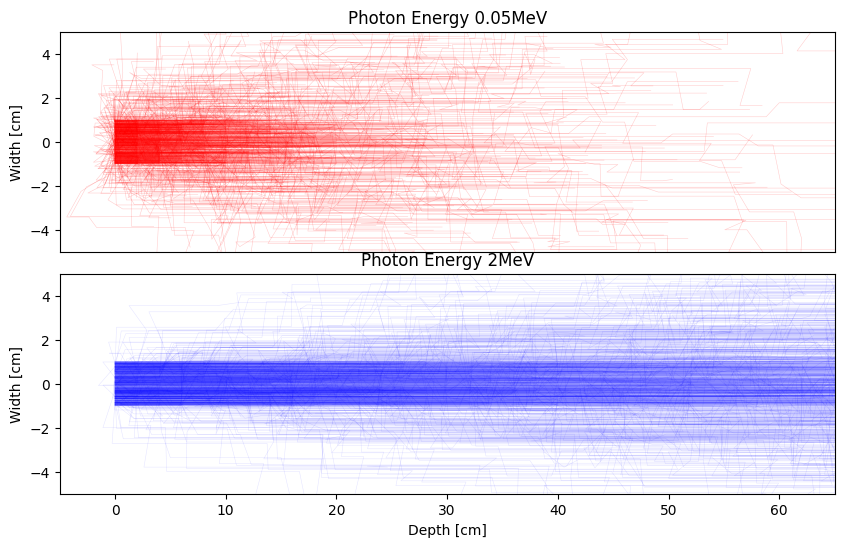

In [46]:
# Créer une figure avec 2 lignes et 1 colonne
fig, axs = plt.subplots(2, 1, figsize=(10, 6), sharex=True, sharey=False)  
# Partager l'axe x entre les deux graphiques, mais pas l'axe y

# Tracer le plan z-x pour l'énergie photonique 1
for n in range(N):  # Boucle pour chaque photon
    axs[0].plot(z1[n], y1[n], 'r-', linewidth=0.4, alpha=0.2)  
    # Tracer z vs y pour chaque photon avec une couleur rouge et faible opacité

# Ajouter des étiquettes et un titre pour le premier sous-graphique (photon_energy_1)
axs[0].set_ylabel('Width [cm]')  # Étiquette de l'axe y
axs[0].set_title(f'Photon Energy {photon_energy_1}MeV')  
axs[0].set_xlim([-5, 65])  # Définir la limite de l'axe x de -5 à 65
axs[0].set_ylim([-5, 5])  # Définir la limite de l'axe y de -5 à 5

# Tracer le plan z-x pour l'énergie photonique 2
for n in range(N):  # Boucle pour chaque photon
    axs[1].plot(z2[n], y2[n], 'b-', linewidth=0.4, alpha=0.1)  
    # Tracer z vs y pour chaque photon avec une couleur bleue et faible opacité

# Ajouter des étiquettes et un titre pour le second sous-graphique (photon_energy_2)
axs[1].set_xlabel('Depth [cm]')  # Étiquette de l'axe x
axs[1].set_ylabel('Width [cm]')  # Étiquette de l'axe y
axs[1].set_title(f'Photon Energy {photon_energy_2}MeV')  
axs[1].set_xlim([-5, 65])  # Définir la limite de l'axe x de -5 à 65
axs[1].set_ylim([-5, 5])  # Définir la limite de l'axe y de -5 à 5

# Supprimer les ticks de l'axe x du graphique du haut
axs[0].tick_params(axis='x', which='both', bottom=False, top=False)  
     # Retirer les marques de l'axe x du sous-graphique supérieur

plt.subplots_adjust(hspace=0.1)  # Espacement horizontal entre les sous-graphes

# Afficher les graphiques
plt.show()

# Interprétation Physique des Trajectoires de Photons à Différentes Énergies

Ces figures montrent les trajectoires de photons avec deux niveaux d'énergie différents : **0.05 MeV** (en rouge) et **2 MeV** (en bleu). J'ai fait ici une interprétation physique des différences observées entre ces trajectoires **en basant sur le module de physique des radiations de Monsieur le professeur Mesradi Mohammed**.

## Interprétation Physique

1. **Photons de Faible Énergie (0.05 MeV)** :
   - À cette énergie, les photons subissent plus fréquemment des **interactions de type diffusion Compton** et **effet photoélectrique** lorsqu’ils traversent la matière.
   - Le **nombre de collisions** et la **probabilité d’interaction** augmentent pour les photons de faible énergie, ce qui explique les trajectoires complexes et la forte dispersion. En particulier :
     - Dans le cas de l’effet photoélectrique, l’énergie du photon est entièrement absorbée par un atome, ce qui limite la pénétration.
     - La diffusion Compton entraîne des changements de direction après chaque interaction, produisant une trajectoire désordonnée et plus "diffuse".
   - Cette tendance à se disperser et à rebondir autour de leur trajectoire initiale est visible dans la figure supérieure (trajectoires rouges), où les photons s’éparpillent largement. Cela reflète la nature imprévisible et la **faible pénétration** des photons de faible énergie.

2. **Photons de Haute Énergie (2 MeV)** :
   - Les photons à haute énergie, tels que ceux à 2 MeV, ont une **probabilité plus faible d'interagir avec la matière** par rapport aux photons de faible énergie.
   - Ils traversent plus facilement la matière en raison de leur énergie élevée, et leur trajectoire est donc plus linéaire et directe.
   - Dans la figure inférieure (trajectoires bleues), on observe que les photons conservent une trajectoire rectiligne sur de plus grandes distances. Cela montre leur **forte pénétration** et une diffusion beaucoup plus faible.
   - Ce comportement est cohérent avec la prédiction théorique : les photons de haute énergie sont moins déviés, car les effets comme la diffusion Compton et l'absorption deviennent moins probables à mesure que l'énergie augmente.

En résumé, les photons de faible énergie ont une trajectoire dispersée en raison des interactions fréquentes avec la matière, tandis que les photons de haute énergie traversent la matière de manière plus directe avec moins de déviations.



## Évolution des Photons de 2 MeV : Atténuation et Diffusion

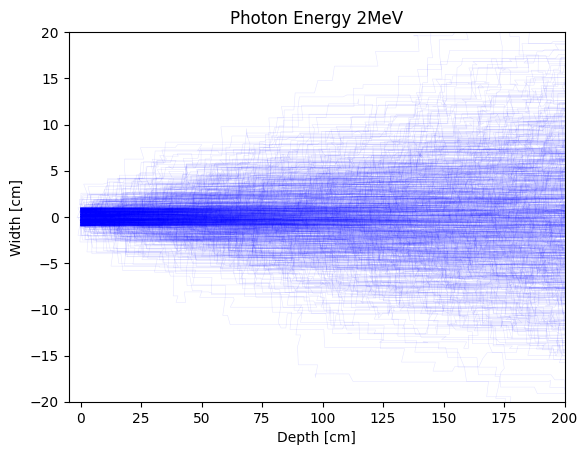

In [48]:
# Pour chaque itération de N, tracer les données correspondant à l'énergie photon 2
for n in range(N): # Tracé des points z2 et y2 avec une couleur bleue, faible largeur de ligne et transparence
    plt.plot(z2[n], y2[n], 'b-', linewidth=0.4, alpha=0.1)  

# Ajouter un label à l'axe des x
plt.xlabel('Depth [cm]')  # L'axe des x représente la profondeur en centimètres

# Ajouter un label à l'axe des y
plt.ylabel('Width [cm]')  # L'axe des y représente la largeur en centimètres

# Définir les limites de l'axe des x (profondeur)
plt.xlim([-5, 200])  # Limite de -5 à 200 pour l'axe des x

# Définir les limites de l'axe des y (largeur)
plt.ylim([-20, 20])  # Limite de -20 à 20 pour l'axe des y

# Ajouter un titre au graphique
plt.title(f'Photon Energy {photon_energy_2}MeV')  # Le titre indique l'énergie du photon en MeV

# Afficher le graphique
plt.show()  # Afficher le graphique avec toutes les modifications


L'analyse des faisceaux de photons de 2 MeV révèle une évolution intéressante. Bien qu'ils commencent avec une forte énergie, les photons à haute énergie subissent une atténuation et présentent une diffusion similaire à celle des photons de plus basse énergie à des profondeurs plus importantes. Au fur et à mesure que le faisceau traverse le milieu, les photons interagissent par diffusion Compton, perdent de l'énergie et subissent ainsi une diffusion plus uniforme lors des interactions suivantes.

    
## Introduction au Projet 2 : Calcul de l'Intégrale en Quatre Dimensions (C++)

Dans ce projet, nous allons estimer une intégrale en quatre dimensions à l'aide de la méthode de Monte Carlo en C++. Cette technique est particulièrement utile pour les intégrales de haute dimension, où les méthodes traditionnelles deviennent inefficaces. 

### Objectif
L'objectif est de générer des points aléatoires dans un espace à quatre dimensions, d'évaluer une fonction donnée en ces points, puis de calculer la moyenne des valeurs obtenues. En multipliant cette moyenne par le volume de l'espace intégré, nous obtenons une estimation de l'intégrale.

### Méthode de Monte Carlo
La méthode de Monte Carlo consiste à approximer l'intégrale en utilisant un grand nombre de points aléatoires. Plus le nombre de points est élevé, plus la précision de l'estimation augmente, mais cela entraîne également un temps de calcul plus important. 

### Outil Utilisé
Pour ce projet, j'ai choisi de coder en C++ dans Visual Studio car cet environnement est mieux adapté aux calculs de haute performance et à la gestion de la mémoire, contrairement à Jupyter Notebook, qui ne prend pas en charge C++ sans l'ajout de noyaux spécifiques.

**Vous trouverez le code complet en C++ du projet dans mon Github**.
    

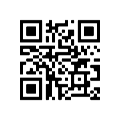

In [1]:
from IPython.display import Image, display
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('Zakaria_TAOUBI.png')
fig, ax = plt.subplots(figsize=(2, 2)) 
ax.imshow(img)
ax.axis('off') 
plt.subplots_adjust(left=0.5- 0.25, right=2, top=0.5 + 0.25, bottom=0.5- 0.25)
plt.show()

In [51]:
import random
import math

def F(x, y, z, w):
    # La fonction à intégrer est exp(x + y + z + w)
    return math.exp(x + y + z + w)

def main():
    # Initialisation des variables pour l'intégrale et les bornes
    sum = 0.0
    x, y, z, w = 0, 0, 0, 0
    
    # Demander les bornes d'intégration pour chaque dimension
    a = float(input("Entrez la valeur de la 1ère intégrale : borne inférieure\n"))
    b = float(input("Entrez la valeur de la 1ère intégrale : borne supérieure\n"))
    c = float(input("Entrez la valeur de la 2ème intégrale : borne inférieure\n"))
    d = float(input("Entrez la valeur de la 2ème intégrale : borne supérieure\n"))
    e = float(input("Entrez la valeur de la 3ème intégrale : borne inférieure\n"))
    f = float(input("Entrez la valeur de la 3ème intégrale : borne supérieure\n"))
    g = float(input("Entrez la valeur de la 4ème intégrale : borne inférieure\n"))
    h = float(input("Entrez la valeur de la 4ème intégrale : borne supérieure\n"))
    
    # Demander le nombre de répétitions pour l'estimation (N)
    N = int(input("Entrez le nombre de répétitions\n"))

    # Boucle Monte Carlo pour générer des points aléatoires et évaluer l'intégrale
    for i in range(N):
        # Générer des valeurs aléatoires dans les intervalles spécifiés pour chaque variable
        x = a + (b - a) * random.random()
        y = c + (d - c) * random.random()
        z = e + (f - e) * random.random()
        w = g + (h - g) * random.random()
        
        sum += F(x, y, z, w)

    # Calcul de l'intégrale en multipliant par le volume de l'espace intégré
    volume = (b - a) * (d - c) * (f - e) * (h - g)
    I = volume * sum / N
    
    # Affichage du résultat
    print(f"Intégrale approximée : {I}")

# Appeler la fonction principale pour exécuter le programme
if __name__ == "__main__":
    main()

Entrez la valeur de la 1ère intégrale : borne inférieure
0
Entrez la valeur de la 1ère intégrale : borne supérieure
5
Entrez la valeur de la 2ème intégrale : borne inférieure
2
Entrez la valeur de la 2ème intégrale : borne supérieure
4
Entrez la valeur de la 3ème intégrale : borne inférieure
3
Entrez la valeur de la 3ème intégrale : borne supérieure
6
Entrez la valeur de la 4ème intégrale : borne inférieure
2
Entrez la valeur de la 4ème intégrale : borne supérieure
6
Entrez le nombre de répétitions
15
Intégrale approximée : 3532118494.0962687


Pour améliorer la précision de l'estimation, il est nécessaire d'augmenter le nombre de répétitions de 15 fois. Cette méthode devient plus fiable à mesure que l'on génère un plus grand nombre de points aléatoires, permettant ainsi d'obtenir une estimation plus stable et proche de la valeur réelle de l'intégrale.

## Loi de Cauchy 

- 1. Densité de probabilité (PDF)

La fonction de densité de probabilité (PDF) pour une loi de Cauchy avec paramètres \(a > 0\) (échelle) et \(x_0\) (centre) est donnée par :

$$
f(x) = \frac{1}{\pi a \left[ 1 + \left( \frac{x - x_0}{a} \right)^2 \right]}, \quad x \in \mathbb{R}.
$$

---

- 2. Fonction de répartition (CDF)

La fonction de répartition \(F(x)\) s'écrit :

$$
F(x) = \frac{1}{\pi} \arctan\left(\frac{x - x_0}{a}\right) + \frac{1}{2}.
$$

---

- 3. Fonction inverse de la répartition

L'inverse de la fonction de répartition \(F(x)\), utilisée pour générer des variables aléatoires suivant une loi de Cauchy à partir d'une variable uniforme \(U(0, 1)\), est donnée par :

$$
x = F^{-1}(y) = x_0 + a \tan\left[\pi \left(y - \frac{1}{2}\right)\right].
$$

---

- 4. Calcul intégral pour la CDF

La fonction de répartition est obtenue en intégrant la densité :

$$
F(x) = \int_{-\infty}^x f(t) \, dt = \frac{1}{\pi} \arctan\left(\frac{x - x_0}{a}\right) + \frac{1}{2}.
$$


In [1]:
import numpy as np

# Fonction qui simule une loi de Cauchy
def LoiCauchy(Y, a, x0):
    return a * np.tan(np.pi * (Y - 0.5)) + x0

# Entrée des paramètres
a = float(input("Entrez le paramètre a (échelle) : "))
x0 = float(input("Entrez le paramètre x0 (position) : "))
N = int(input("Entrez le nombre de répétitions : "))

# Boucle de génération
for i in range(N):
    Y = np.random.rand()  # Génération uniforme
    X = LoiCauchy(Y, a, x0)  # Génération Cauchy
    print(X)


Entrez le paramètre a (échelle) : 1
Entrez le paramètre x0 (position) : 0
Entrez le nombre de répétitions : 10
-12.325141275090324
-7.629571014642534
-1.3731142942396586
-2.0609379734124023
7.360861292116273
-0.9314837603011623
3.24028721509971
0.1408318049300397
9.970592602400489
0.2643339493052541


Pour une analyse claire et concise, nous avons initialement généré un échantillon de 10 valeurs (bien que 10 000 aient été générées, ce qui a donné 200 pages de résultats), afin de limiter la complexité des données. Cependant, pour une meilleure visualisation de la loi de Cauchy, nous avons opté pour la génération de 10 000 valeurs, permettant ainsi de représenter plus fidèlement la distribution sous forme de graphique. Cette approche équilibre simplicité et précision dans l'analyse.

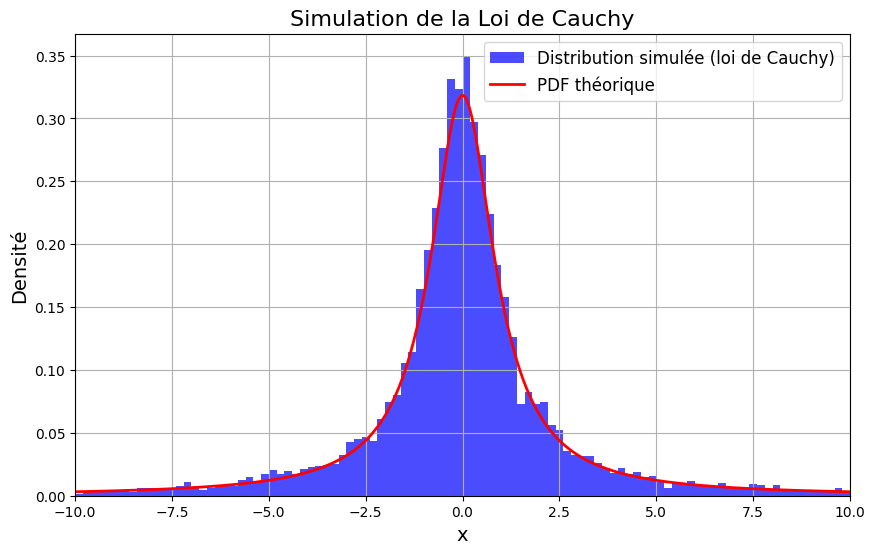

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Paramètres de la loi de Cauchy
a = 1.0   # Paramètre d'échelle (largeur)
x0 = 0.0  # Paramètre de localisation (centre)
N = 10000  # Nombre d'échantillons

# Générer des nombres aléatoires uniformes entre 0 et 1
U = np.random.uniform(0, 1, N)

# Appliquer la formule de l'inverse de la fonction de répartition pour générer des variables aléatoires Cauchy
X = x0 + a * np.tan(np.pi * (U - 0.5))

# Tracer l'histogramme des valeurs simulées
plt.figure(figsize=(10, 6))
plt.hist(X, bins=100, range=(-10, 10), density=True, color='blue', alpha=0.7, label="Distribution simulée (loi de Cauchy)")

# Superposer la fonction de densité théorique pour comparaison
x = np.linspace(-10, 10, 1000)
pdf = 1 / (np.pi * a * (1 + ((x - x0) / a) ** 2))
plt.plot(x, pdf, 'r', label="PDF théorique", linewidth=2)

plt.title("Simulation de la Loi de Cauchy", fontsize=16)
plt.xlabel("x", fontsize=14)
plt.ylabel("Densité", fontsize=14)
plt.legend(fontsize=12)
plt.grid()
plt.xlim(-10, 10)  # Fixer les limites de l'axe x pour une meilleure visualisation
plt.show()


### Commentaire

1. **Description** : Le graphique compare une simulation de la loi de Cauchy (histogramme bleu) avec sa densité théorique (courbe rouge). Les valeurs de xsont limitées à [-10, 10].

2. **Analyse** :  
   - **Pic central** : Le pic à x = 0 reflète la concentration de la densité autour de xo  
   - **Queues épaisses** : La loi montre des valeurs extrêmes fréquentes, typiques de ses "queues épaisses".  

3. **Conclusion** : La simulation correspond bien à la densité théorique, confirmant la validité des données générées.


 <div style="background-color:#e6f7ff; padding: 20px; border-radius: 8px;">

### Remerciements et Conclusion
    
Ce projet a permis d'explorer l'impact de l'énergie des photons sur leur comportement dans un milieu aqueux. Les résultats obtenus montrent des différences significatives entre les faibles et hautes énergies, ce qui est crucial pour les applications en radiothérapie.Merci d'avoir suivi cette simulation, en espérant que les analyses présentées vous ont apporté des perspectives nouvelles et utiles.
    
**Zakaria Taoubi**   

Étudiant en Master Physique Médicale

Institut Supérieur des Sciences de la Santé (ISSS) - Settat
</div>
